# LOANS EXPLORATION : PART 1 FULL EXPLORATION

## PRELIMINARY WRANGLING

# DATA SET:
The provided data set consists of several key performance indicators such as borrowerAPR,borrower rate,income range, prosper rating, etc of 113937 loans.The key performance indicators are what determines if a prospective borrower will be granted a loan and how many percent interest will charged for the loan and the time duration that will be granted for payment of the loan.

In [1]:
#Importation of all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import nbconvert
%matplotlib inline

In [2]:
#loading the data sets
loans = pd.read_csv('ProsperLoanData.csv')

In [3]:
#Assessment of the data
loans.head()
loans.info()
loans.describe
loans.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

(113937, 81)

There is a need to allow jupyter notes to allow us view all the columns visually to get an idea of the data. To enable us view that we will be doing a little  resetting below.

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

#### As seen above from the first assessment, there are a whooping 81 columns and over 110,000 rows of data, We will not be needing all those columns, we will keep only columns relevant to the insights to be gotten from the data and possibly delete some rows of data as well if neccessary.
We can either create a subset of the data to be used or completely drop irrelevant columns
I think dropping the columns will be better to reduce the load and increase the processing speed.
But it's much easier and saves time to use a subset of the data.

After proper thought and scrutiny of the data set based on possible insights that can be gotten from the data.The columns in the cell below will be used for the analysis

In [5]:
# subsetting relevant columns
useful_cols =['EstimatedReturn','LoanStatus','StatedMonthlyIncome','IncomeRange','DelinquenciesLast7Years','Term','AmountDelinquent',
              'ProsperScore','CreditGrade',
             'EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner','CreditScoreRangeLower',
              'CreditScoreRangeUpper',
             'CurrentCreditLines','OpenCreditLines','RevolvingCreditBalance',
              'DebtToIncomeRatio','BorrowerAPR','BorrowerRate',
              'AvailableBankcardCredit','ProsperRating (Alpha)','ProsperRating (numeric)','LoanOriginalAmount']
factors= loans[useful_cols]

In [6]:
"checking for null values "
factors.isnull().sum()

EstimatedReturn             29084
LoanStatus                      0
StatedMonthlyIncome             0
IncomeRange                     0
DelinquenciesLast7Years       990
Term                            0
AmountDelinquent             7622
ProsperScore                29084
CreditGrade                 84984
EmploymentStatus             2255
EmploymentStatusDuration     7625
IsBorrowerHomeowner             0
CreditScoreRangeLower         591
CreditScoreRangeUpper         591
CurrentCreditLines           7604
OpenCreditLines              7604
RevolvingCreditBalance       7604
DebtToIncomeRatio            8554
BorrowerAPR                    25
BorrowerRate                    0
AvailableBankcardCredit      7544
ProsperRating (Alpha)       29084
ProsperRating (numeric)     29084
LoanOriginalAmount              0
dtype: int64

The cell above displays the sum of all the null values in the respective cells.

In [7]:
#sum of rows with null borrower APR 
factors.BorrowerAPR.isnull().sum()

25

In [8]:
#displaying the rows with null values for borrower APR
null_APR = pd.isnull(factors["BorrowerAPR"])
factors[null_APR]

EstimatedReturn LoanStatus  StatedMonthlyIncome    IncomeRange  \
2543                NaN  Completed          8333.333333  Not displayed   
14632               NaN  Completed          4166.666667  Not displayed   
25166               NaN  Completed          9166.666667  Not displayed   
25330               NaN  Completed          7083.333333  Not displayed   
29773               NaN  Completed          8333.333333  Not displayed   
39870               NaN  Completed          3333.333333  Not displayed   
43587               NaN  Completed         18333.333333  Not displayed   
62297               NaN  Completed         10000.000000  Not displayed   
71280               NaN  Completed          7083.333333  Not displayed   
71875               NaN  Completed          4166.666667  Not displayed   
73945               NaN  Completed         29166.666667  Not displayed   
74114               NaN  Completed          9458.333333  Not displayed   
75710               NaN  Completed          6666.666667  Not displayed   
78414               NaN  Completed          8333.333333  Not displayed   
80369               NaN  Completed          4166.666667  Not displayed   
81848               NaN  Completed          1083.333333  Not displayed   
90598               NaN  Completed         16666.666667  Not displayed   
92516               NaN  Completed         12500.000000  Not displayed   
103509              NaN  Completed         12500.000000  Not displayed   
105925              NaN  Completed          6666.666667  Not displayed   
106465              NaN  Completed          4166.666667  Not displayed   
106735              NaN  Completed         14583.333333  Not displayed   
109027              NaN  Completed         25000.000000  Not displayed   
111607              NaN  Completed         16666.666667  Not displayed   
113921              NaN  Completed         12500.000000  Not displayed   

        DelinquenciesLast7Years  Term  AmountDelinquent  ProsperScore  \
2543                        NaN    36               NaN           NaN   
14632                       NaN    36               NaN           NaN   
25166                       NaN    36               NaN           NaN   
25330                       NaN    36               NaN           NaN   
29773                       NaN    36               NaN           NaN   
39870                       NaN    36               NaN           NaN   
43587                       NaN    36               NaN           NaN   
62297                       NaN    36               NaN           NaN   
71280                       NaN    36               NaN           NaN   
71875                       NaN    36               NaN           NaN   
73945                       NaN    36               NaN           NaN   
74114                       NaN    36               NaN           NaN   
75710                       NaN    36               NaN           NaN   
78414                       NaN    36               NaN           NaN   
80369                       NaN    36               NaN           NaN   
81848                       NaN    36               NaN           NaN   
90598                       NaN    36               NaN           NaN   
92516                       NaN    36               NaN           NaN   
103509                      NaN    36               NaN           NaN   
105925                      NaN    36               NaN           NaN   
106465                      NaN    36               NaN           NaN   
106735                      NaN    36               NaN           NaN   
109027                      NaN    36               NaN           NaN   
111607                      NaN    36               NaN           NaN   
113921                      NaN    36               NaN           NaN   

       CreditGrade EmploymentStatus  EmploymentStatusDuration  \
2543            HR              NaN                       NaN   
14632           AA              NaN                   

#### The rows will be dropped because alot of othe columns which happen to be very important key perfromance indicators in the loan are also null values, hence the null values can not be made up for.
#### Its best to drop such rows of data.

In [9]:
#dropping rows with null values for Borrower APR
factors = factors[~factors.BorrowerAPR.isna()]

In [10]:
#testing
factors.BorrowerAPR.isnull().sum()

0

In [11]:
factors.head()

EstimatedReturn LoanStatus  StatedMonthlyIncome     IncomeRange  \
0              NaN  Completed          3083.333333  $25,000-49,999   
1          0.05470    Current          6125.000000  $50,000-74,999   
2              NaN  Completed          2083.333333   Not displayed   
3          0.06000    Current          2875.000000  $25,000-49,999   
4          0.09066    Current          9583.333333       $100,000+   

   DelinquenciesLast7Years  Term  AmountDelinquent  ProsperScore CreditGrade  \
0                      4.0    36             472.0           NaN           C   
1                      0.0    36               0.0           7.0         NaN   
2                      0.0    36               NaN           NaN          HR   
3                     14.0    36           10056.0           9.0         NaN   
4                      0.0    36               0.0           4.0         NaN   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  \
0                  640.0                  659.0                 5.0   
1                  680.0                  699.0                14.0   
2                  480.0                  499.0                 NaN   
3                  800.0                  819.0                 5.0   
4                  680.0                  699.0                19.0   

   OpenCreditLines  RevolvingCreditBalance  DebtToIncomeRatio  BorrowerAPR  \
0              4.0                     0.0               0.17      0.16516   
1             14.0                  3989.0               0.18      0.12016   
2              NaN                     NaN               0.06      0.28269   
3              5.0                  1444.0               0.15      0.12528   
4             19.0                  6193.0               0.26      0.24614   

   BorrowerRate  AvailableBankcardCredit ProsperRating (Alpha)  \
0        0.1580                   1500.0                   NaN   
1        0.0920                  10266.0                     A   
2        0.2750                      NaN                   NaN   
3        0.0974                  30754.0                     A   
4        0.2085                    695.0                     D   

   ProsperRating (numeric)  LoanOriginalAmount  
0                      NaN                9425  
1                      6.0               10000  
2                      NaN                3001  
3                      6.0               10000  
4                      3.0               15000

In [12]:
#summary statistics of the numerical variables
factors.describe()

EstimatedReturn  StatedMonthlyIncome  DelinquenciesLast7Years  \
count     84853.000000         1.139120e+05            112947.000000   
mean          0.096068         5.606973e+03                 4.154984   
std           0.030403         7.478338e+03                10.160216   
min          -0.182700         0.000000e+00                 0.000000   
25%           0.074080         3.200000e+03                 0.000000   
50%           0.091700         4.666667e+03                 0.000000   
75%           0.116600         6.817083e+03                 3.000000   
max           0.283700         1.750003e+06                99.000000   

                Term  AmountDelinquent  ProsperScore  \
count  113912.000000     106315.000000  84853.000000   
mean       40.831308        984.507059      5.950067   
std        10.437112       7158.270157      2.376501   
min        12.000000          0.000000      1.000000   
25%        36.000000          0.000000      4.000000   
50%        36.000000          0.000000      6.000000   
75%        36.000000          0.000000      8.000000   
max        60.000000     463881.000000     11.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             106312.000000          113346.000000          113346.000000   
mean                  96.071582             685.567731             704.567731   
std                   94.480605              66.458275              66.458275   
min                    0.000000               0.000000              19.000000   
25%                   26.000000             660.000000             679.000000   
50%                   67.000000             680.000000             699.000000   
75%                  137.000000             720.000000             739.000000   
max                  755.000000             880.000000             899.000000   

       CurrentCreditLines  OpenCreditLines  RevolvingCreditBalance  \
count       106333.000000    106333.000000            1.063330e+05   
mean            10.317192         9.260164            1.759871e+04   
std              5.457866         5.022644            3.293640e+04   
min              0.000000         0.000000            0.000000e+00   
25%              7.000000         6.000000            3.121000e+03   
50%             10.000000         9.000000            8.549000e+03   
75%             13.000000        12.000000            1.952100e+04   
max             59.000000        54.000000            1.435667e+06   

       DebtToIncomeRatio    BorrowerAPR   BorrowerRate  \
count      105358.000000  113912.000000  113912.000000   
mean            0.275993       0.218828       0.192786   
std             0.551814       0.080364       0.074809   
min             0.000000       0.006530       0.000000   
25%             0.140000       0.156290       0.134000   
50%             0.220000       0.209760       0.184000   
75%             0.320000       0.283810       0.250000   
max            10.010000       0.512290       0.497500   

       AvailableBankcardCredit  ProsperRating (numeric)  LoanOriginalAmount  
count            106393.000000             84853.000000       113912.000000  
mean              11210.225447                 4.072243         8338.015661  
std               19818.361309                 1.673227         6245.940592  
min                   0.000000                 1.000000         1000.000000  
25%                 880.000000                 3.000000         4000.000000  
50%                4100.000000                 4.000000         6500.000000  
75%               13180.000000                 5.000000        12000.000000  
max              646285.000000                 7.000000        35000.000000

## Univariate Exploration


# Univariate plots

### Borrower APR and Borrower Rate.

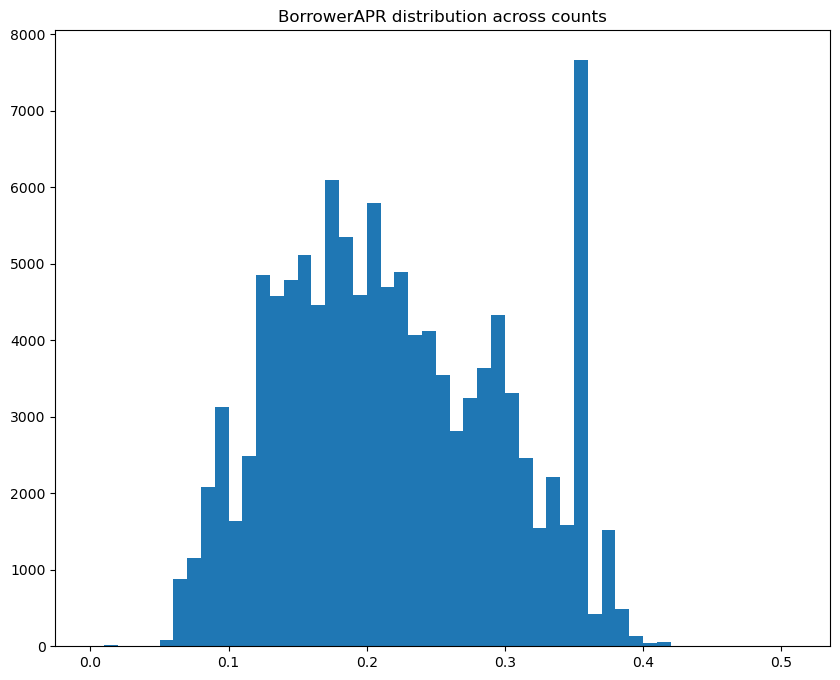

In [13]:
#use of histogram plots to show the distribution of borrowerAPR
plt.figure(figsize =[10,8])
bins= np.arange(0,factors.BorrowerAPR.max()+ 0.005,0.01)
plt.title("BorrowerAPR distribution across counts")
plt.hist(factors['BorrowerAPR'],bins = bins);

Text(0.5, 1.0, 'Borrower Rate distribution across counts')

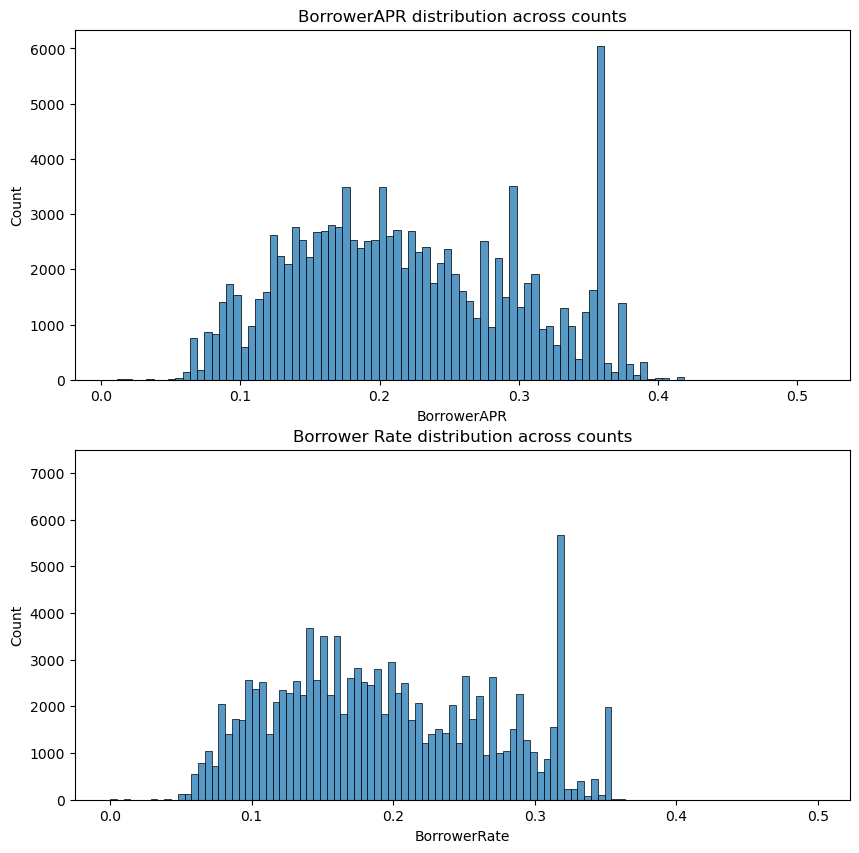

In [14]:
fig, ax = plt.subplots(nrows=2, figsize = [10,10])
default_color = sb.color_palette()[0]
sb.histplot(data = factors,x = 'BorrowerAPR',ax = ax[0]).set_title('BorrowerAPR distribution across counts')
plt.ylim(0,7500)
sb.histplot(data = factors,x = 'BorrowerRate',ax = ax[1]).set_title('Borrower Rate distribution across counts')

# Observation:
The scale used for plotting this histogram is 0.005 per bin on the x-axis.
By just looking at the plot,it can be seen that the borrowerAPR score with highest count is 0.36, the borrowerAPR scores ranges from as low as below 0.0045 to above 0.4.
There are'nt many borrower APR scores above 0.4.There happens to be alot of borrower APR scores with around 0.3,0.2 and 0.175.

## Income Range
A histogram of income Range will be plotted as well to get an idea of the economic class of people that collect loans.

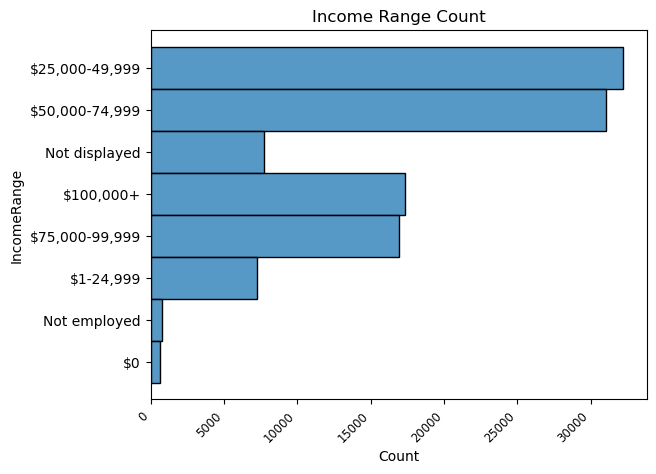

In [15]:
#seaborn is used again to give a more detailed distribution and summary of IncomeRange
sb.histplot(data = factors,y = 'IncomeRange').set_title('Income Range Count')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small');

The income range taking the most loans are people earning from $25000-49,999, followed up closely by $50,000-74999 earners

## Original Loan Amount

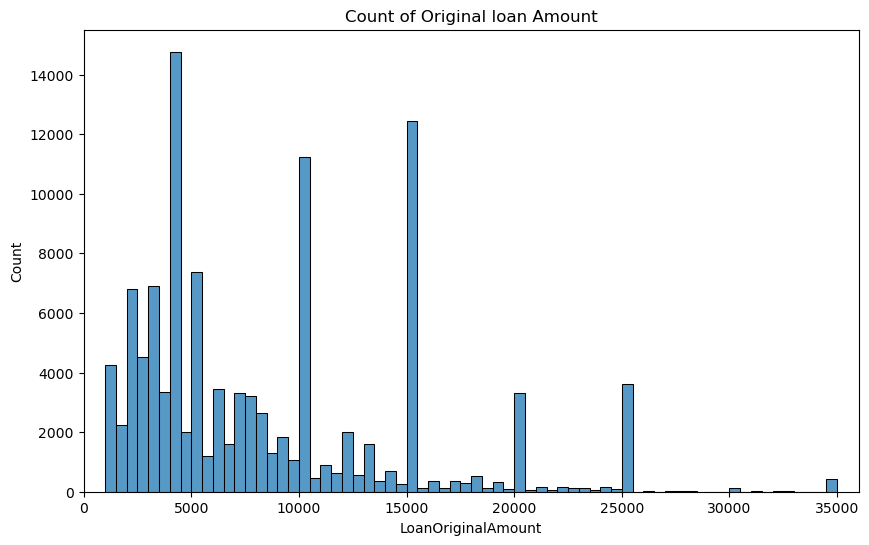

In [16]:
#setting the dimensions
fig, ax = plt.subplots(figsize=(10, 6))
#drawing the plot
sb.histplot(data = factors , x ='LoanOriginalAmount',binwidth =500).set_title('Count of Original loan Amount')
plt.xlim(0,36000)
plt.show()

One of the bin represents $500.The lowest loan amount issued is $1500 and the highest issued is $35000.The most issued original loan amount is $4000, with over 14000 counts.

## Distribution of credit score
There is no column with a credit score, but there are two columns with credit score ranges, we will have to create a new column that will be the mean of both columns in other to get a credit score

In [17]:
#credit score creation using creditscore range upper and creditscore range lower.
#factors['creditscore'] = (factors["CreditScoreRangeUpper"]+factors["CreditScoreLower"]).mean(axis =1)
factors["creditscore"] = factors[["CreditScoreRangeUpper", "CreditScoreRangeLower"]].mean(axis=1)

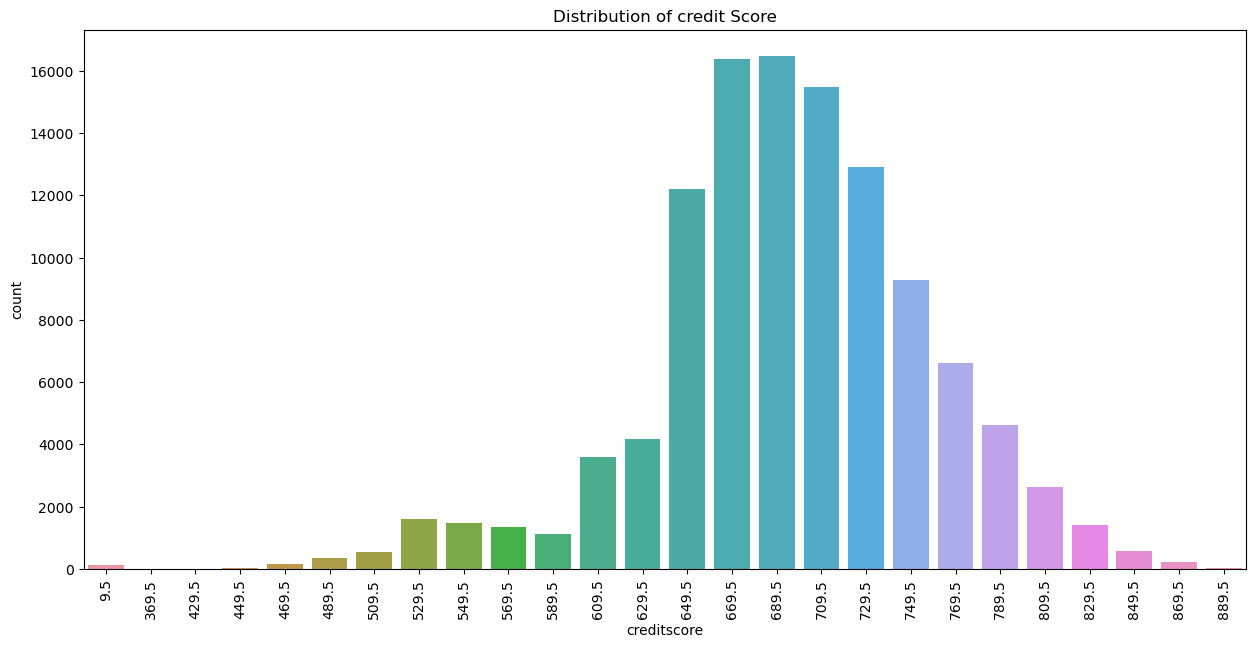

In [18]:
factors.creditscore.value_counts()
plt.figure(figsize=(15,7))
sb.countplot(data= factors, x= "creditscore").set_title("Distribution of credit Score")
plt.xticks(rotation = 90);

### OBSERVATION
The distribution of the creditscores are skewed to the right. With 689.5 as the most common creditscore in the data set. The lowest  credit score is 9.5, it's an outlier and most likely to be some sort of error.The outlier will be dropped because,credit score cannot be that low. The highest credit score is 889.5 and it's the least common credit score in the data set.

In [19]:
#creating a subset and dropping such rows of data.
credit_score_high = factors[(factors['creditscore']==9.5)].index
credit_score_high

Int64Index([   794,    912,   1685,   4290,   4371,   4430,   4672,   5684,
              6877,   7739,
            ...
            105032, 106897, 108762, 109060, 109468, 109522, 109855, 110290,
            111624, 113848],
           dtype='int64', length=133)

In [20]:
#dropping the rows
factors.drop(credit_score_high,inplace = True)

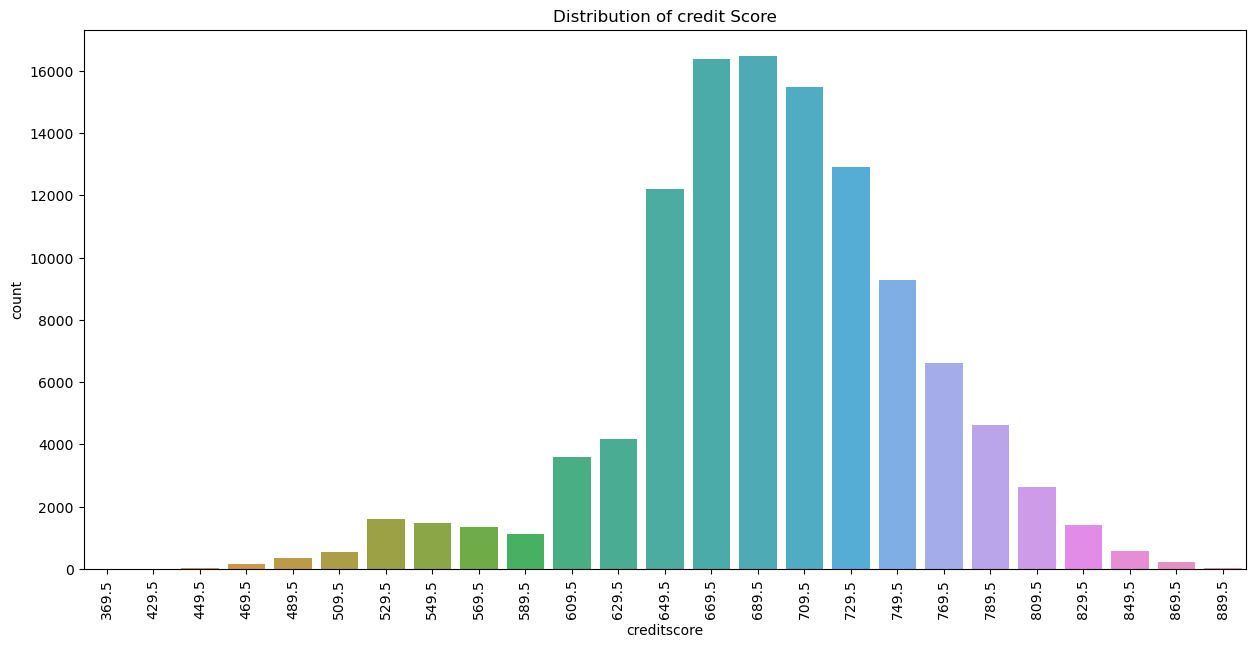

In [21]:
#checking the distribution after removing the outlier
factors.creditscore.value_counts()
plt.figure(figsize=(15,7))
sb.countplot(data= factors, x= "creditscore").set_title("Distribution of credit Score")
plt.xticks(rotation = 90);

### Stated Monthly Income

(0.0, 45000.0)

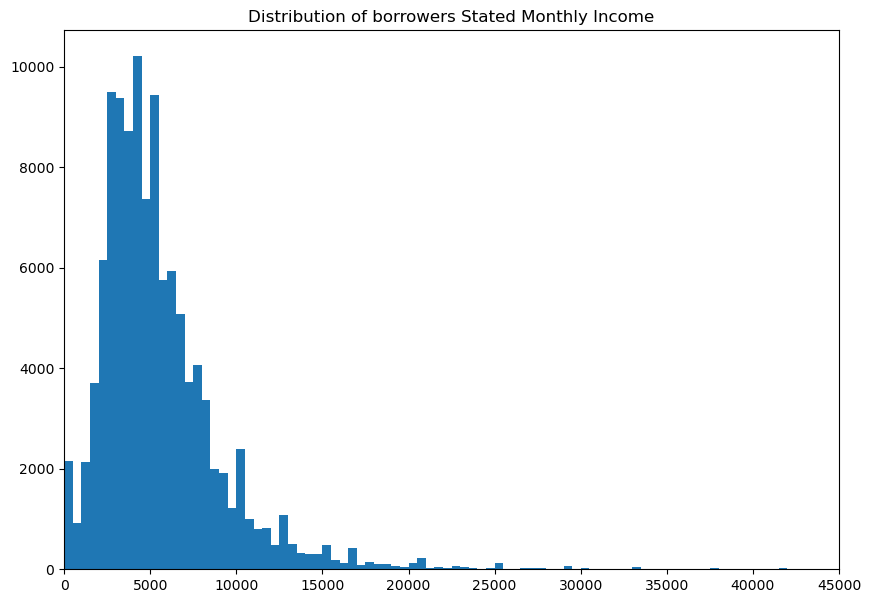

In [22]:
#distribution of stated Monthly income
plt.figure(figsize=(10,7))
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = factors, x = 'StatedMonthlyIncome', bins=bins_smi);
plt.title('Distribution of borrowers Stated Monthly Income')
plt.xlim(0,45000)

### OBSERVATION

A majority of the monthly income of borrowers falls within 0-10,000 dollars monthly income.There are few outliers earning above 25000 dollars per month.

### Loan Term

In [23]:
factors.Term.value_counts()

36    87620
60    24545
12     1614
Name: Term, dtype: int64

### Employment Status,Loanterm and ProsperRating

In [24]:
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
factors['ProsperRating (Alpha)'] = factors['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
factors['EmploymentStatus'] = factors['EmploymentStatus'].astype(ordered_var)

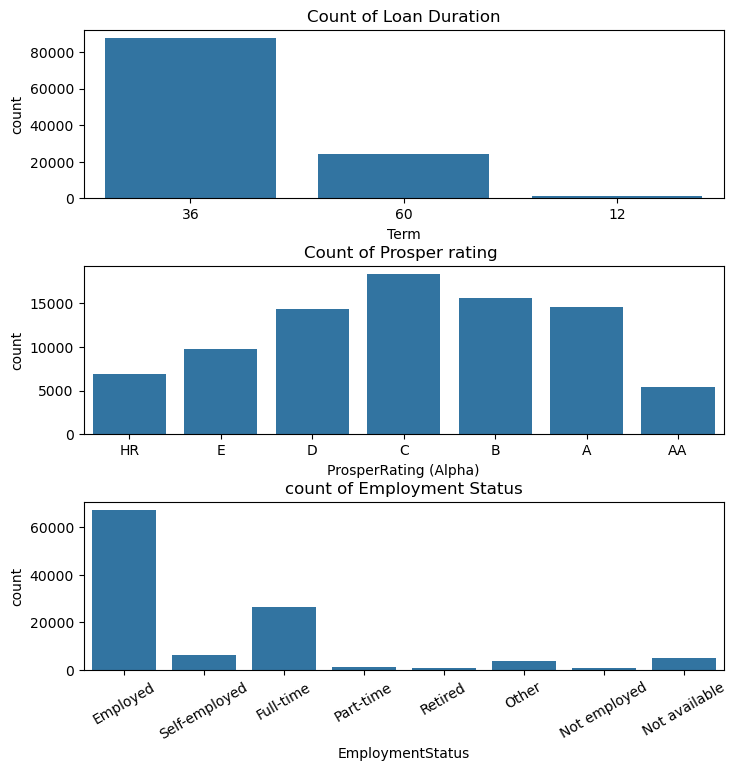

In [25]:
fig, ax = plt.subplots(nrows=3, figsize = [8,8])
default_color = sb.color_palette()[0]
type_order = factors['Term'].value_counts().index
sb.countplot(data = factors, x = 'Term', color = default_color, order=type_order, ax = ax[0]).set_title('Count of Loan Duration')
sb.countplot(data = factors, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1]).set_title('Count of Prosper rating ')
sb.countplot(data = factors, x = 'EmploymentStatus', color = default_color, ax = ax[2]).set_title('count of Employment Status');
plt.xticks(rotation=30);
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

## Observation:
#### Employment Status column:
The most people being issued loan as can be seen from the plot above is the people under the employed category. Followed next by the Fulltime category.Unemployed category is one of the least issued amongst the part_time and retired categories.
#### Prosper rating:
The category with the highest count for prosper rating is the C category and the least category is the AA category.
#### Term:
A majority of the loans were issued for a period of 36months and the least duartion for loan term is 12months.

### Prosper Rating
A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

Text(0.5, 1.0, 'Count of Prosper Score ')

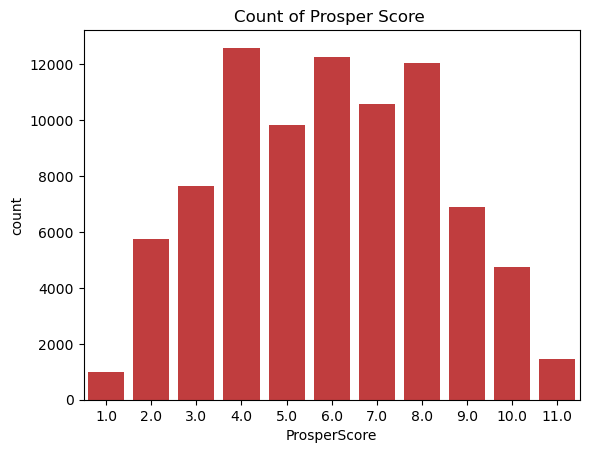

In [26]:

default_color = sb.color_palette()[3]
sb.countplot(data = factors, x = 'ProsperScore', color = default_color).set_title('Count of Prosper Score ')

### OBSERVATION
A majority of the borrowers have a propser score of within 4.0 to 9.0. The prosper score ranges from 1.0 to 10.0, but we can see some borrowers scoring up to 11.0, these must be an error that must be fixed by dropping rows with 11.0

In [27]:
factors.query('ProsperScore > 10')

EstimatedReturn              LoanStatus  StatedMonthlyIncome  \
9               0.04231                 Current          3333.333333   
69              0.06499                 Current          2700.000000   
158             0.04929                 Current          6666.666667   
224             0.06388                 Current         33333.333333   
236             0.04261                 Current          4083.333333   
277             0.07192                 Current          6833.333333   
476             0.06491                 Current         13083.333333   
491             0.07463                 Current          8166.666667   
532             0.06388                 Current         10833.333333   
554             0.04929                 Current         15000.000000   
633             0.05879                 Current         15000.000000   
690             0.06663                 Current          4500.000000   
765             0.07077                 Current          8458.250000   
771             0.05516                 Current          9333.333333   
854             0.06910                 Current          5416.666667   
890             0.07077                 Current         14333.333333   
901             0.06499                 Current         16666.666667   
1017            0.04261                 Current          4666.666667   
1085            0.04929                 Current          2641.666667   
1153            0.04806                 Current          6250.000000   
1460            0.06663                 Current          5009.750000   
1842            0.04260                 Current          8608.250000   
1892            0.06081                 Current          7500.000000   
1962            0.06663                 Current          4000.000000   
1972            0.07689                 Current          2500.000000   
2048            0.04554                 Current         10416.666667   
2097            0.06706                 Current         16750.000000   
2181            0.08223                 Current          8750.000000   
2288            0.05879                 Current         11250.000000   
2487            0.04260                 Current         16666.666667   
2548            0.04260                 Current          8916.666667   
2550            0.04529                 Current          9583.333333   
2644            0.06499                 Current          5833.333333   
2913            0.07077                 Current          6833.333333   
3006            0.06663                 Current          6916.666667   
3067            0.04554                 Current          9583.333333   
3091            0.04261                 Current          6250.000000   
3136            0.07824                 Current          2114.916667   
3156            0.04929                 Current          5333.333333   
3189            0.07078                 Current         11666.666667   
3356            0.08268                 Current          4333.333333   
3371            0.04261                 Current          8916.666667   
3474            0.06462                 Current          7083.333333   
3519            0.04261                 Current          7879.500000   
3594            0.04929                 Current          2317.416667   
3614            0.05568                 Current          5083.333333   
3646            0.04260                 Current          9583.333333   
3802            0.05047                 Current          4583.333333   
3929            0.04929                 Current          9666.666667   
4020            0.07077                 Current          8666.666667   
4068            0.07487                 Current          5166.666667   
4094            0.06026                 Current         12500.000000   
4472            0.07192                 Current          3583.333333   
4631            0.04260                 Current          7083.333333   
4689            0.06968                 Current 

In [28]:
#creating a subset and dropping such rows of data.
prosper_score_high = factors[(factors['ProsperScore']> 10)].index
prosper_score_high
#dropping such rows
factors.drop(prosper_score_high,inplace = True)

In [29]:
#testing drop
factors.query('ProsperScore > 10')

Empty DataFrame
Columns: [EstimatedReturn, LoanStatus, StatedMonthlyIncome, IncomeRange, DelinquenciesLast7Years, Term, AmountDelinquent, ProsperScore, CreditGrade, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CreditScoreRangeLower, CreditScoreRangeUpper, CurrentCreditLines, OpenCreditLines, RevolvingCreditBalance, DebtToIncomeRatio, BorrowerAPR, BorrowerRate, AvailableBankcardCredit, ProsperRating (Alpha), ProsperRating (numeric), LoanOriginalAmount, creditscore]
Index: []

Text(0.5, 1.0, 'Count of Prosper Score ')

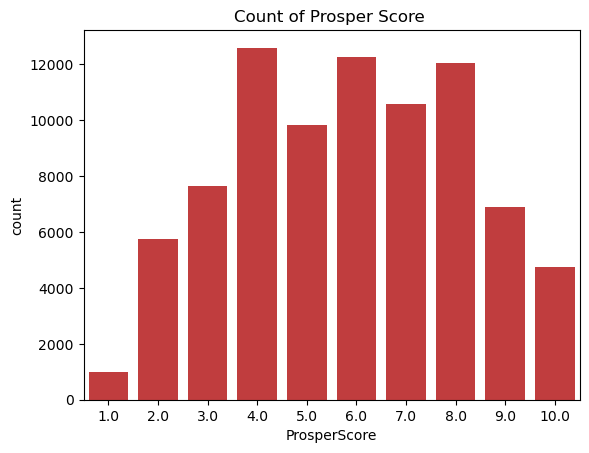

In [30]:
#checking the plot after the drop
default_color = sb.color_palette()[3]
sb.countplot(data = factors, x = 'ProsperScore', color = default_color).set_title('Count of Prosper Score ')

### Delinquencies and amount deliquent
AmountDeliquent: Dollars delinquent at the time the credit profile was pulled.
Delinquencieslast 7 years: Number of delinquencies in the past 7 years at the time the credit profile was pulled.

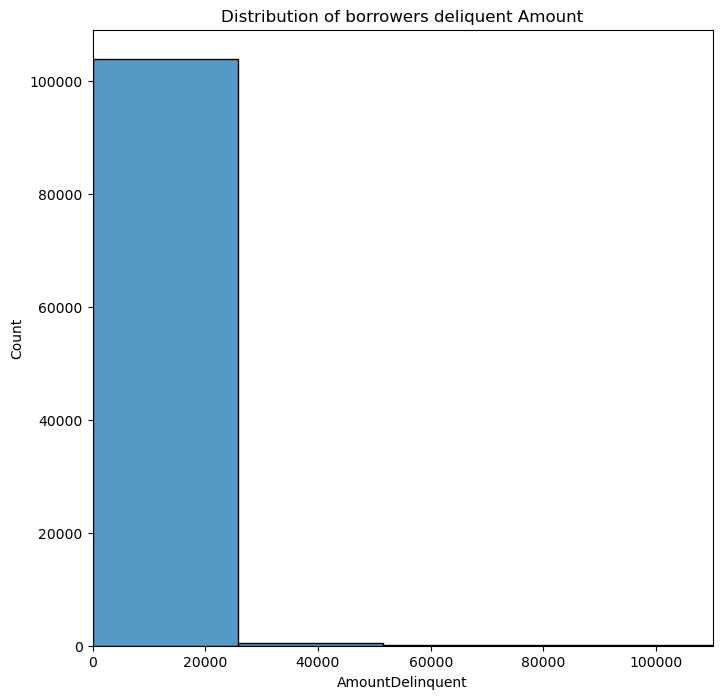

In [31]:
x=np.array([10000,20000,30000,40000,50000,60000,70000,80000,90000])
fig, ax = plt.subplots(nrows=1, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.histplot(data =factors,x ='AmountDelinquent',color= default_color).set_title('Distribution of borrowers deliquent Amount')
plt.xlim(0,110000);

### Observation:
A majority of the borrowers have a deliquent amount of 20,000 at the time the loan was applied for.There are a few outliers having up to 100000. But the most of the borrowers delinquent amount fall between 0-50000.

### DelinquenciesLast7Years
Number of delinquencies in the past 7 years at the time the credit profile was pulled.

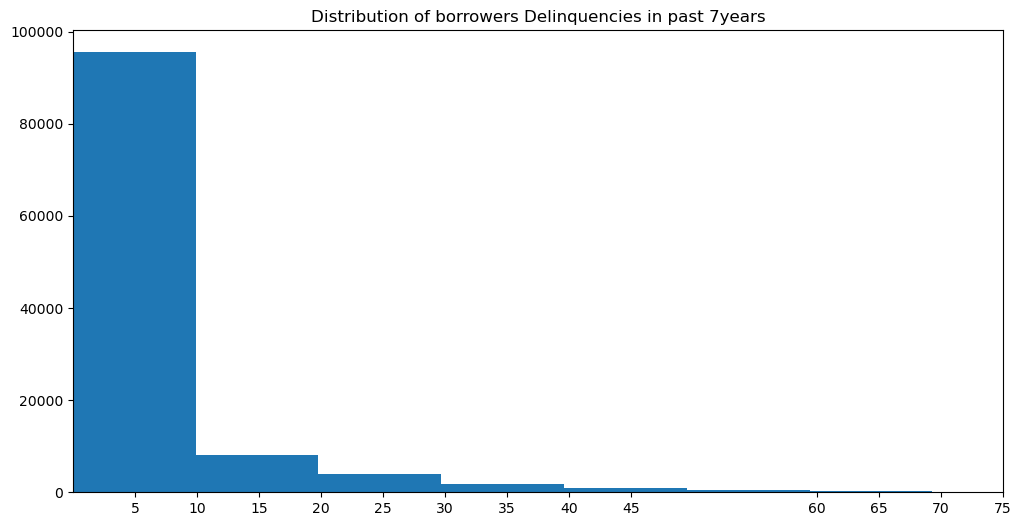

In [32]:
x=np.array([5,10,15,20,25,30,35,40,45,60,65,70,75])
plt.figure(figsize =(12,6))
plt.title('Distribution of borrowers Delinquencies in past 7years');
plt.hist(data= factors, x= 'DelinquenciesLast7Years')
plt.xlim(0,70)
plt.xticks(x);

### OBSERVATION
Borrowers delinquencies in the last 7years is skewed towrards the right with the majority of the counts occuring between 5 and 10.We seem to be having some outliers around 65-70.
The deliquent amount is skewed towards the right as well, as the amount increases the count of the deliquent amounts decreases.
The skewedness of both columns makes sense because they should be closely linked with each other.

### current credit lines
Number of current credit lines at the time the credit profile was pulled.

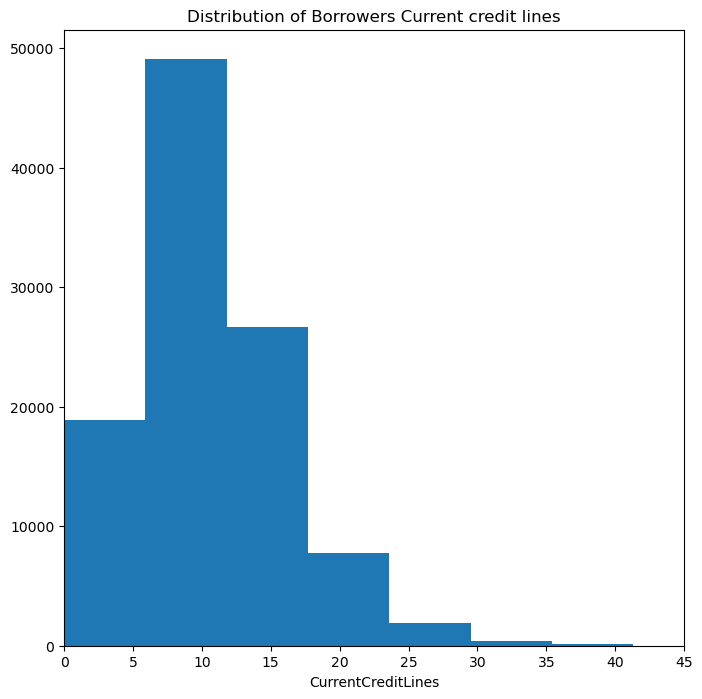

In [33]:
plt.subplots(figsize=[8,8])
plt.title('Distribution of Borrowers Current credit lines')
plt.hist(data = factors, x = 'CurrentCreditLines')
plt.xlabel('CurrentCreditLines')
plt.xlim(0,45);

### Observation:
The frequency of current credit lines ranges between 0-35, with highest frequency in 10 and the lowest in 40.

### Distribution of open credit line

Text(0.5, 1.0, 'Distribution of open credit lines')

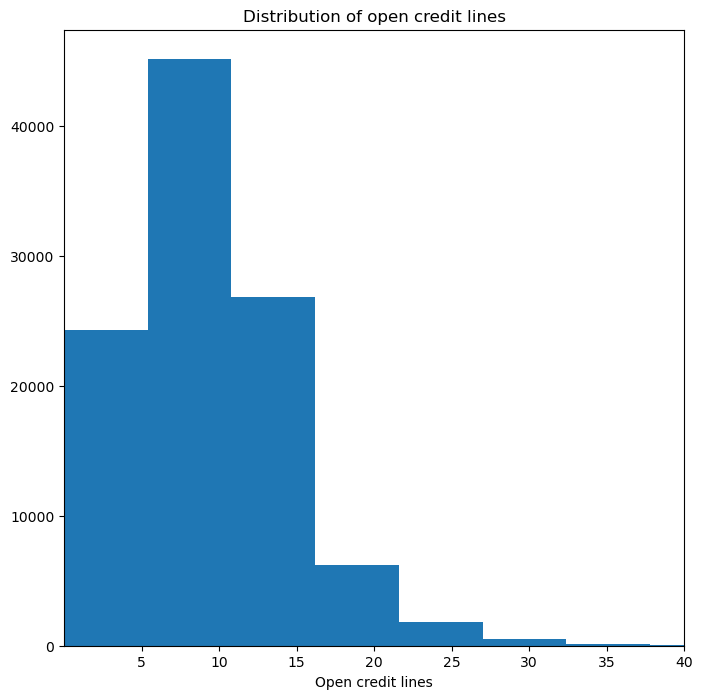

In [34]:
plt.figure(figsize =(8,8))
x= np.array([5,10,15,20,25,30,35,40])
plt.hist(data = factors, x = 'OpenCreditLines');
plt.xticks(x)
plt.xlabel('Open credit lines')
plt.xlim(0,40)
plt.title('Distribution of open credit lines')

### Observation:



### Revolvingcredit balance:
Dollars of revolving credit at the time the credit profile was pulled.

(0.0, 270000.0)

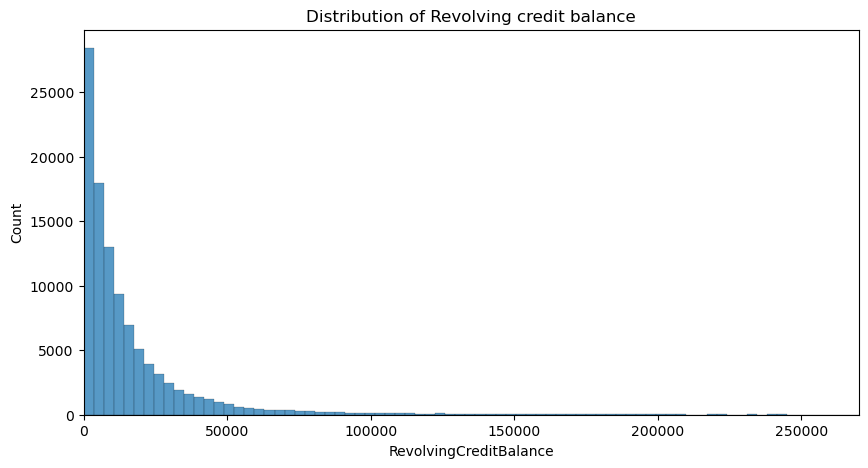

In [35]:
plt.figure(figsize=(10,5))
sb.histplot(data = factors, x = 'RevolvingCreditBalance',binwidth =3500)
plt.title('Distribution of Revolving credit balance')
plt.xlim(0,270000)

### Observation:
As expected, the revolving credit balance is skewed towards the right, which is a clear indication that the frequency of people with high revolving credit balance, reduces as the revolving credit balance increases.The majority of the clients revolving credit balance falls within 0-100,000 dollars, with a few outliers having up to around 230,000dollars.
 

### Available bank credit
The total available credit via bank card at the time the credit profile was pulled.

Text(0, 0.5, 'count of available bank credit')

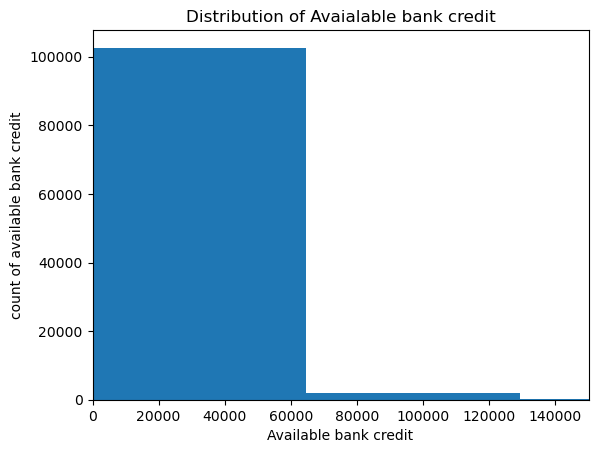

In [36]:
plt.title("Distribution of Avaialable bank credit")
plt.hist(data = factors,x ='AvailableBankcardCredit')
plt.xlim(0,150000)
plt.xlabel('Available bank credit')
plt.ylabel('count of available bank credit')

### Observation:
The range of available bank credit falls within 0-120,000.

# INSIGHTS

### 1.What are the factors that affect a loans outcome status?
### 2.What factors affects the borrower APR? 
### 3.Does the term of the loan affect the annual percentage rate(Borrower's APR)  of the borrower?

## Insight1.
## What Factors affects a loan's outcome status?:
To answer this, a close examination of the factors with a strong correlation with prosperscore,and prosper rating will be explored.Other plots will be utilised as well.
Prosper score and prosper rating are used because of they're positively strongly correalted with each other.

## BIVARIATE EXPLORATION

In [37]:
## Creation of custom built functions for plotting due to the frequency of using such.

In [38]:
# Function to create violin plot
def violingrid(x, y, **kwargs):
    """ Quick hack for creating violin plots with seaborn's PairGrid. """    
    ax = sb.violinplot(x=x, y=y, color='g', inner='quartile')
    ax.tick_params(rotation=90)
    
 # Function to create box plot
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    ax = sb.boxplot(x=x, y=y, color='r')               
    ax.tick_params(rotation=90)
    
 # Function to create reg plot
def reggrid(x, y, **kwargs):
    """ Quick hack for creating reg plots with seaborn's PairGrid. """
    ax = sb.regplot(x=x, y=y, color='b')               
    ax.tick_params(rotation=90)

### General overview of correlation between variables

In [39]:
#categorising the data types into numeric and categorical data
num_vars = factors.select_dtypes(include='number').columns
cat_vars = ['Term', 'EmploymentStatus', 'ProsperRating (Alpha)','IsBorrowerHomeowner']

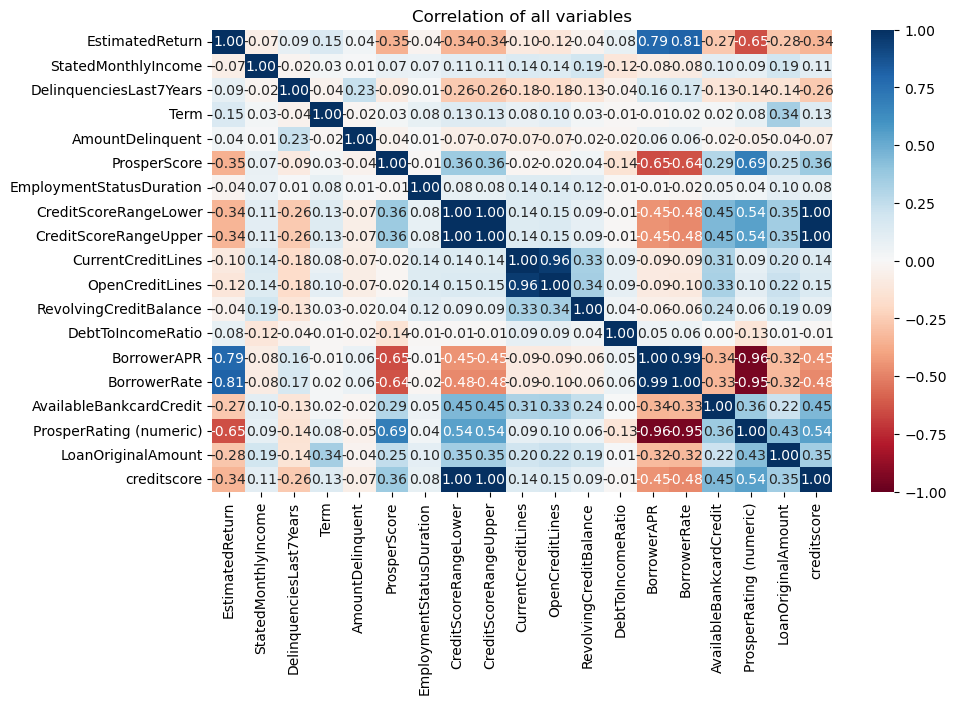

In [40]:
#Correlation between variables
## A heatmap is used to depict a genral overview of the correlartion between all the variables in the data set.
plt.figure(figsize = [10,6])
plt.title('Correlation of all variables')
sb.heatmap(factors[num_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'RdBu',vmin=-1,vmax=1, center = 0)
plt.show()

The intensity of the color scale is meant to depict the level of correlation betweeen two variables,the darker the blue , the more positive the correlation and the deeper the red, the more negative the correlation between both variables.
Neutral correlations almost have a white color.Which depicts that both variables have little to no correlation
The numbers in the maps also depicts the level of correlation, the higher the number, the higher the positive correlation.
For example credit score range lower and upper have a very strong negative correaltion with the credit score, borrowerAPR and borrower rate have a very strong negative correaltion with prosper rating, which makes sense, because the better a borrowers score, the lesser the interest rates should be.

The heatmap above displays the intensity of correlation the various variables have with each other. All the variables with either a strong positive or strong negative correlation with the prosper score and prosper rating can be said to affect the loan's status outcome.
The most notable features are:
1.The creditscore- This has a strong positive correlation
2.Loan original Amount
3.Available bank credit
4.Borrower rate
5.Borrower APR
Other features will be explored irrespective

Text(0.5, 1.0, 'Correlation of prosper score and prosper rating')

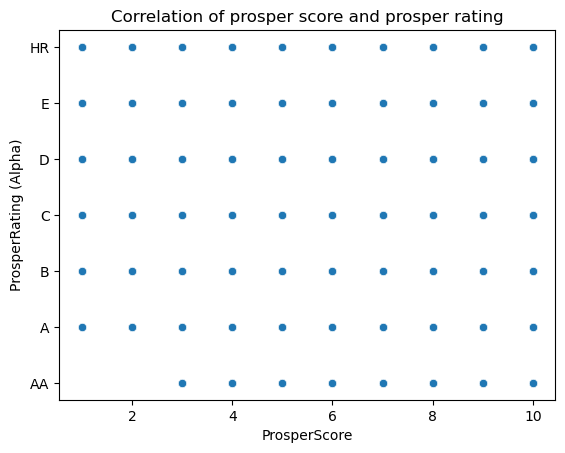

In [41]:
#A plot to show how closely related the prosperscore and the prosper rating are.
sb.scatterplot(data=factors,x= 'ProsperScore',y='ProsperRating (Alpha)').set_title('Correlation of prosper score and prosper rating')

### Creditscore and prosper score

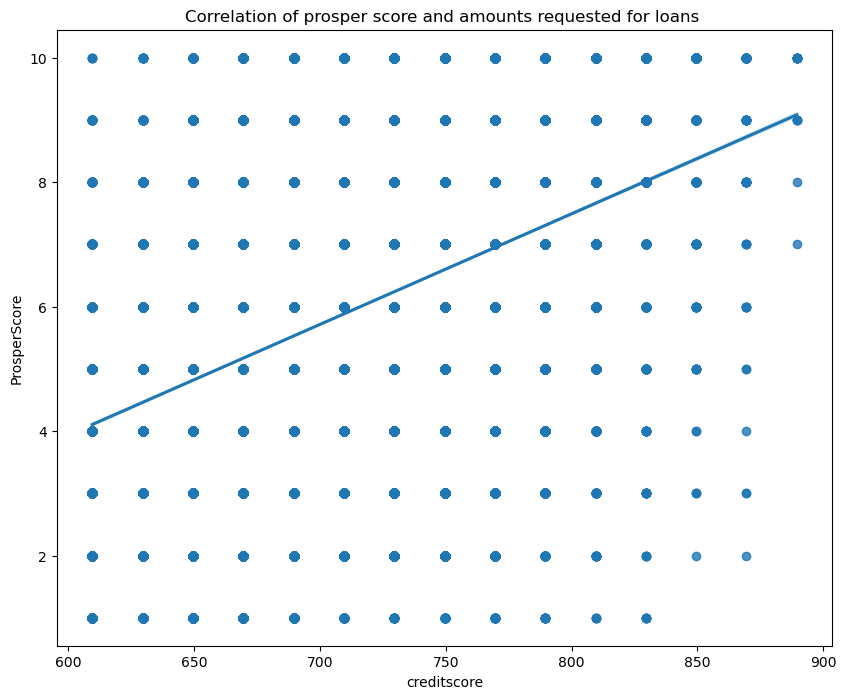

In [42]:
plt.figure(figsize = [10, 8])
sb.regplot(data=factors,x= 'creditscore',y='ProsperScore');
plt.title("Correlation of prosper score and amounts requested for loans ");

### Observation:
The both variables have a strong linear positive correlation.And this simply depicts that clients with higher creditscore tend to get higher prosperscore and stands a higher chance of getting their loans approved.

## Is BorrowerHome owner or not

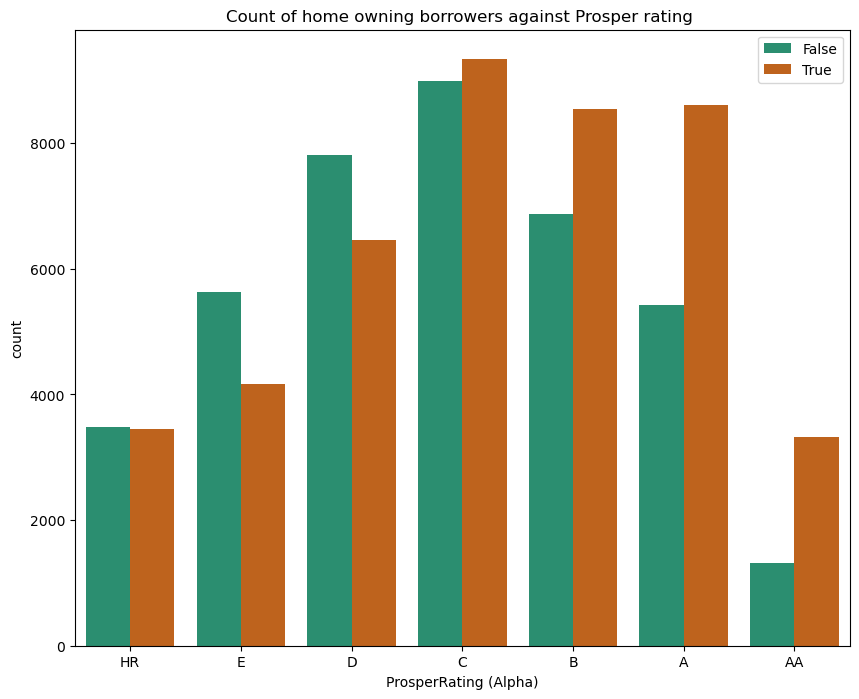

In [43]:
plt.figure(figsize = [10, 8])
sb.countplot(data=factors, x='ProsperRating (Alpha)', hue='IsBorrowerHomeowner', palette='Dark2');
plt.legend(loc=1);
plt.title("Count of home owning borrowers against Prosper rating ");

### OBSERVATION:
It can be seen from the plot above that in the C,B,A and AA sub categories of the prosper rating,the borrowers with homes always had a higher count than others wthout home,for the last three ratings,the borrowers without home had a much higher count.
The pattern observed was for borrowers without home,there was a steady incline up until the prosper rating B subacategory where a steady decline started and it can be seen that the lowest count for non home owners is in the highest prosper rating AA.
It can also be seen that the AA prosper rating had the highest difference between home owners and non home owners.

### Loan Original Amount

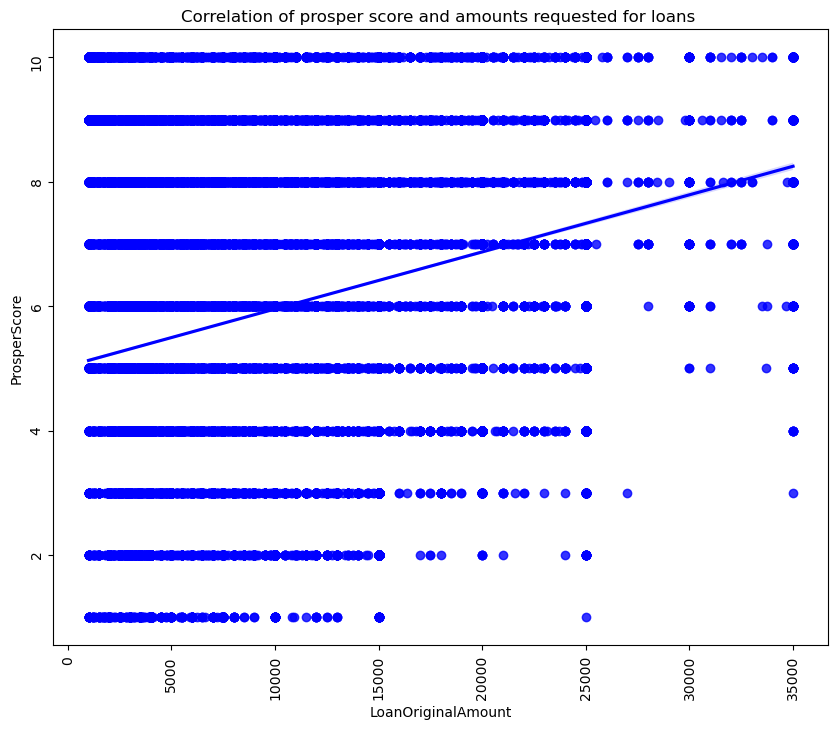

In [44]:
plt.figure(figsize = [10, 8])
reggrid(factors.LoanOriginalAmount,factors.ProsperScore);
plt.title("Correlation of prosper score and amounts requested for loans ");

### Observation:
There is a strong positive linear correlation between the both variables, as it's seen in the plot above as the prosper score increases, the amount of loan increases as well.

### How employment Status Affects Prosper Rating 

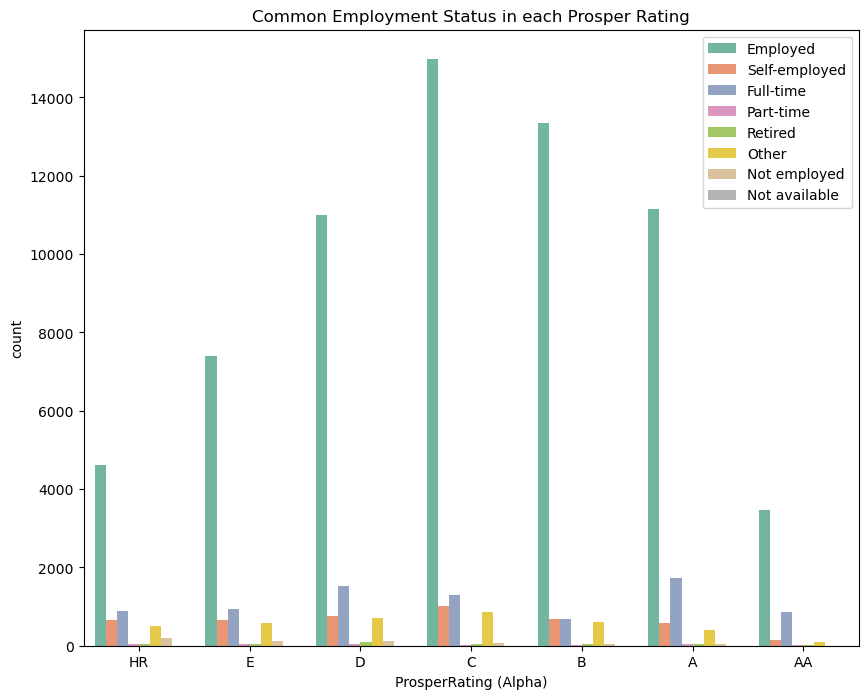

In [45]:
plt.figure(figsize = [10,8])
sb.countplot(data=factors, x='ProsperRating (Alpha)', hue='EmploymentStatus', palette='Set2');
plt.legend(loc=1);
plt.title("Common Employment Status in each Prosper Rating");

### Observation:
It can be seen from the plot above that amongst all the sub categories in the prosper rating, the employed people always stood a better chance of getting better prosper scores.The fulltime sub category ranked the highest in the AA and A sub category of the prosper rating.
The employment status plays a key role in determining the propser rating of a client.

## How does the debt to income ratio affect the client's prosper score?

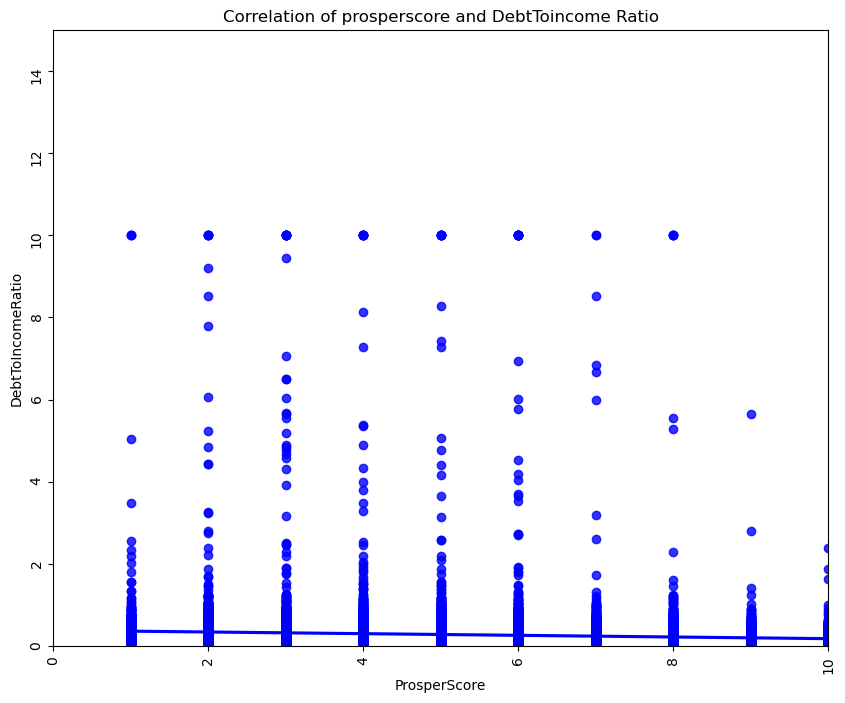

In [46]:
plt.figure(figsize = [10, 8])
reggrid(factors.ProsperScore, factors.DebtToIncomeRatio);
plt.ylim(0,15)
plt.xlim(0,10)
plt.title("Correlation of prosperscore and DebtToincome Ratio");

### Observation:
The plot above shows us that a higher debt to income ratio will result in a reduced prosperscore.The both variables have a strong negative linear correlation.

### How Revolving Credit balance affects prosper score

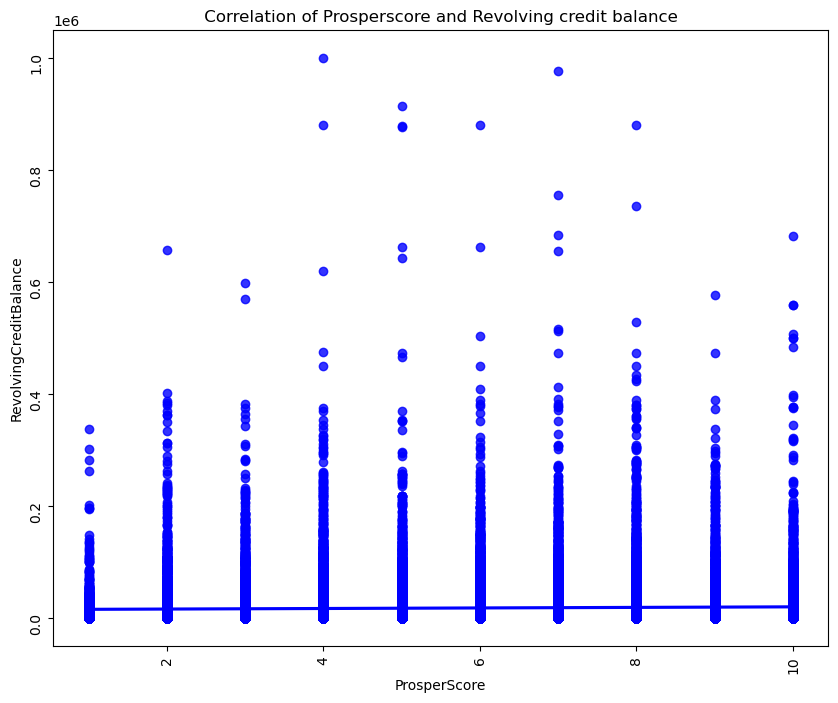

In [47]:
plt.figure(figsize = [10, 8])
reggrid(factors.ProsperScore, factors.RevolvingCreditBalance);
plt.title(" Correlation of Prosperscore and Revolving credit balance ");

### Observation:
There is a positive correlation between the revolving credit balance and the prosperscore.Which is very unexpected,maybe it's because clients with a higher revolving credit balance means they have a track record of taking loans and stands a higher chance of paying back the loan.

### Stated Monthly Income and Prosper score

(0.0, 65000.0)

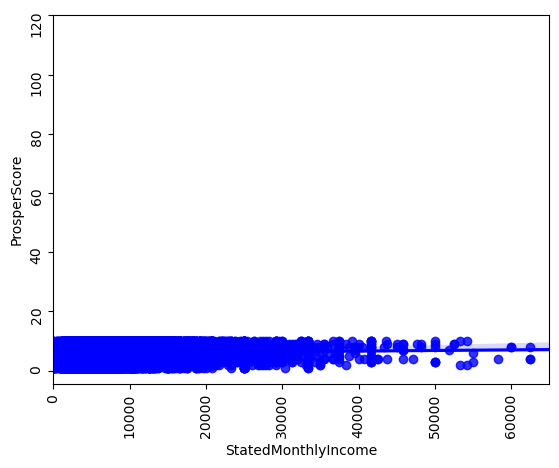

In [48]:
plt.subplots()
reggrid(factors.StatedMonthlyIncome,factors.ProsperScore)
plt.xlim(0,65000)

In [49]:
#There is an outlier that's skewing the plot and i think it needs to be dropped

### Observation: 
The plot shows a positive linear correlation with the prosper score variable. This indicates that the monthly income plays affects the approval of a loan.

In [50]:
#fishing out the outlier
factors.StatedMonthlyIncome.max()

1750002.916667

In [51]:
#Dropping the outlier
out_income = factors[(factors['StatedMonthlyIncome']== 1750002.916667)].index
#dropping such rows
factors.drop(out_income,inplace = True)


In [52]:
factors.query('StatedMonthlyIncome ==1750002.916667')

Empty DataFrame
Columns: [EstimatedReturn, LoanStatus, StatedMonthlyIncome, IncomeRange, DelinquenciesLast7Years, Term, AmountDelinquent, ProsperScore, CreditGrade, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CreditScoreRangeLower, CreditScoreRangeUpper, CurrentCreditLines, OpenCreditLines, RevolvingCreditBalance, DebtToIncomeRatio, BorrowerAPR, BorrowerRate, AvailableBankcardCredit, ProsperRating (Alpha), ProsperRating (numeric), LoanOriginalAmount, creditscore]
Index: []

(0.0, 11.0)

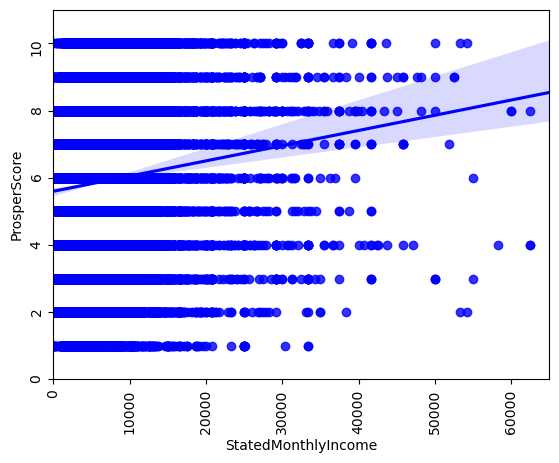

In [53]:
#plotting after the drop
plt.subplots()
reggrid(factors.StatedMonthlyIncome,factors.ProsperScore)
plt.xlim(0,65000)
plt.ylim(0,11)

## Stated Monthly Income and Prosper score. and terms

<AxesSubplot:xlabel='ProsperScore', ylabel='StatedMonthlyIncome'>

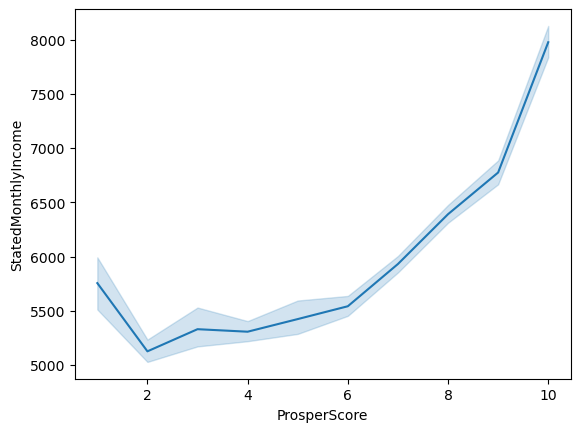

In [54]:
sb.lineplot(data = factors, x ='ProsperScore',y='StatedMonthlyIncome')

### Term and Prosper Score

Text(0.5, 1.0, 'Count of prosper score for the loan Terms')

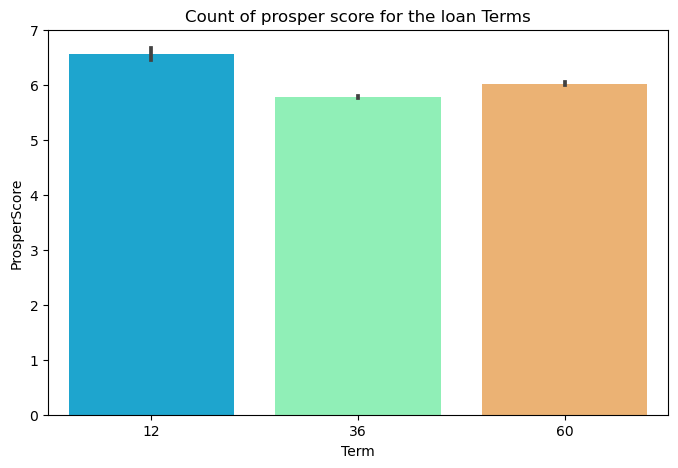

In [55]:
plt.figure(figsize=(8,5))
sb.barplot(data=factors,x='Term',y='ProsperScore', palette='rainbow')
plt.title("Count of prosper score for the loan Terms")

### Observation:
The lowest loan term had the highest prosper score , but there was no particular pattern.

# INSIGHT 1 SUMMARY FOR BIVARIATE ANALYSIS:
After exploring the features of the data set,certains features displayed a strong correlation using bivariate plots and countplots to examine the relationship between the prosper score and prosper rating.
The features that showed a corrrelation are;
1. Debt to income ratio: It was seen from the plot that the higher the debt to income ratio, the lower the client's prosper score.It had a strong linear correlation with the prosperscore.
2. Creditscore: The credit score had a positive linear correlation with the prosper score.The higher the clients credit score, the higher their prosper score and rating, which means it increases their chances of getting their loan approved.
3. Employment Status:Amongst the subcategories of employment status provided, the employed category had a higher count across all the prosper rating categories when a countplot was used, this indicates that the eployment status affects the prosper score.
4. Is borrower Home owner: The availability of a home when applying for a loan also plays a role, from the plot it was seen that clients with a home had a higher prosper rating than the others without a home.
5. Revolving credit Balance: The scatterplot of the revolving credit balance showed a positive linear correlation with the prosper score.This indicates that the higher the revolving credit balance, the higher the prosper score.
6. StatedMonthly Income: The plot revealed that an increase in the monthly income causes an increase in the prosper score as well, hence it plays a role in determining the status outcome of  a loan application.

# Insight 2
## What Affects the borrowers APR or interest rates

### Interaction of  of numeric and categorical features.
The heat map plotted earlier will be used to determine the features that affects the borrowers APR and borrower rate. By exploring all the features with a correlation to borrower APR.
Most notable features from the heatmap are;
1.prosper rating
2.Prosper score
3.Credit score
4.Delnquencies in past 7years
5.Available bank credit
6.Loan Original Amount
7.Debt to income ratio

### Borrower APR and Prosper score

(0.0, 11.0)

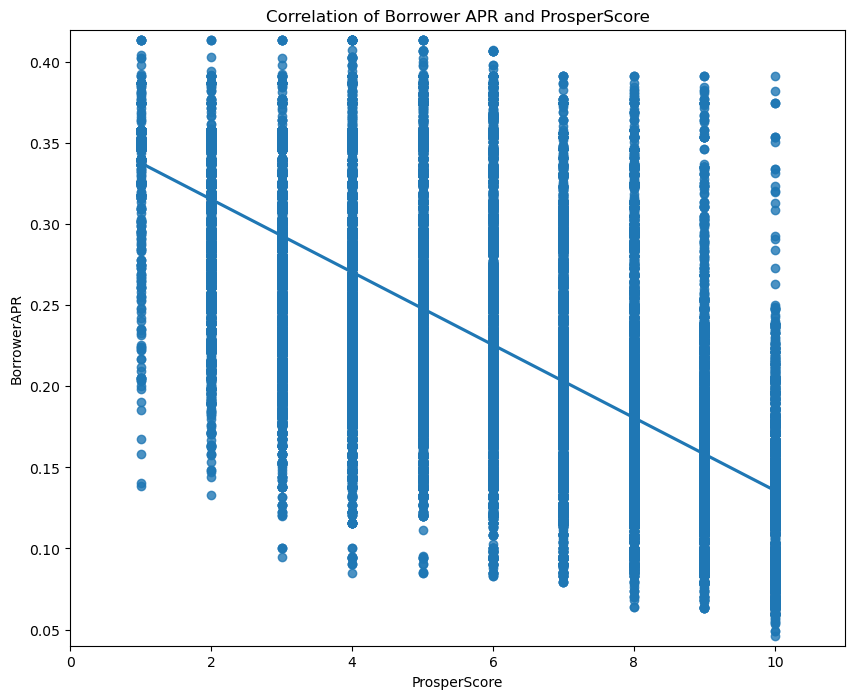

In [56]:
plt.figure(figsize = [10, 8])
sb.regplot(data=factors, y='BorrowerAPR', x='ProsperScore');
plt.title("Correlation of Borrower APR and ProsperScore");
plt.ylim(0.04,0.42)
plt.xlim(0,11)

### Observation:
A linear negative correlation can be observed from the plot above. As the prosper score increases, the interest rate(Borrower APR) charged also decreases.

### Borrower APR and prosper rating

Text(0.5, 1.0, 'Correlation of prosper rating and Annual interest rates')

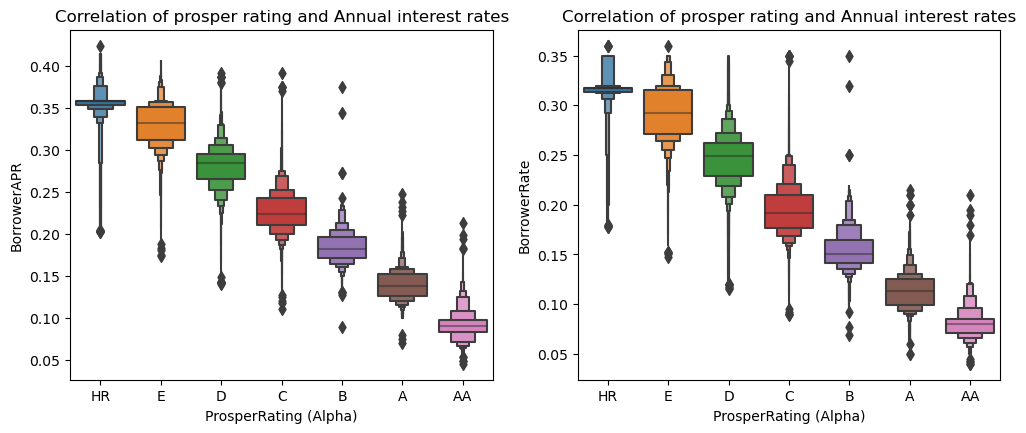

In [57]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sb.boxenplot(data= factors,x='ProsperRating (Alpha)',y='BorrowerAPR').set_title('Correlation of prosper rating and Annual interest rates')
plt.subplot(2,2,2)
sb.boxenplot(data= factors,x='ProsperRating (Alpha)',y='BorrowerRate').set_title('Correlation of prosper rating and Annual interest rates')

### Observation:
The median values of the borrower APR is seen to decrease as the  various sub categories of the prosper rating variable increases.A borrower with a good prosper score will most likely be charged less interest for their loans. 

###  Borrower APR and DebtTo income ratio

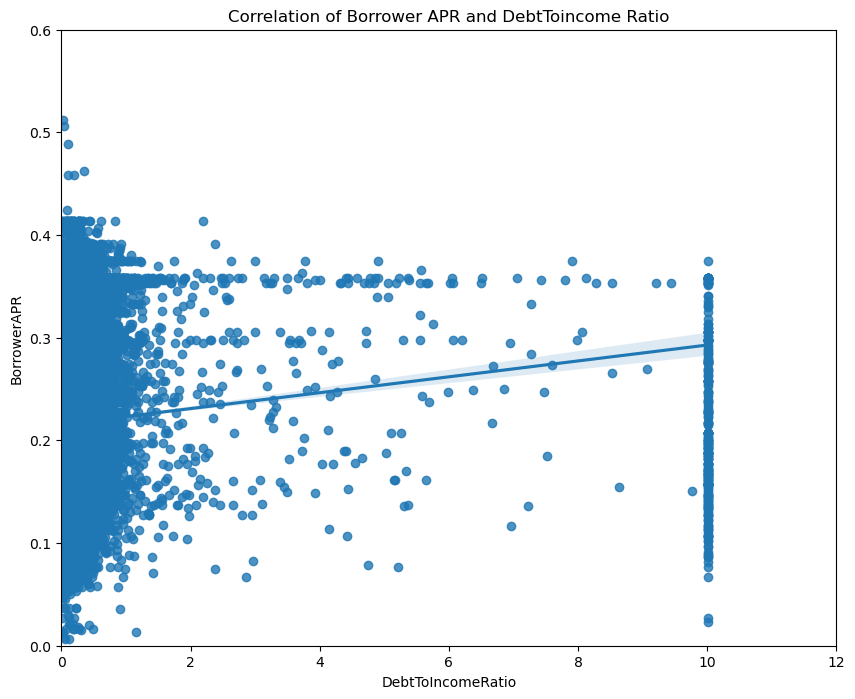

In [58]:
plt.figure(figsize = [10, 8])
sb.regplot(data=factors, y='BorrowerAPR', x='DebtToIncomeRatio');
plt.ylim(0,0.6)
plt.xlim(0,12)
plt.title("Correlation of Borrower APR and DebtToincome Ratio");

### Observation:
The plot above shows a positive linear correlation between the both variables. This indicates that as the debt to income ratio increases, the client will be charged a higher interest rate (APR) for their loans.

## Borrower APR and Creditscore
### How does the creditscore affect the borrower APR?

(350.0, 950.0)

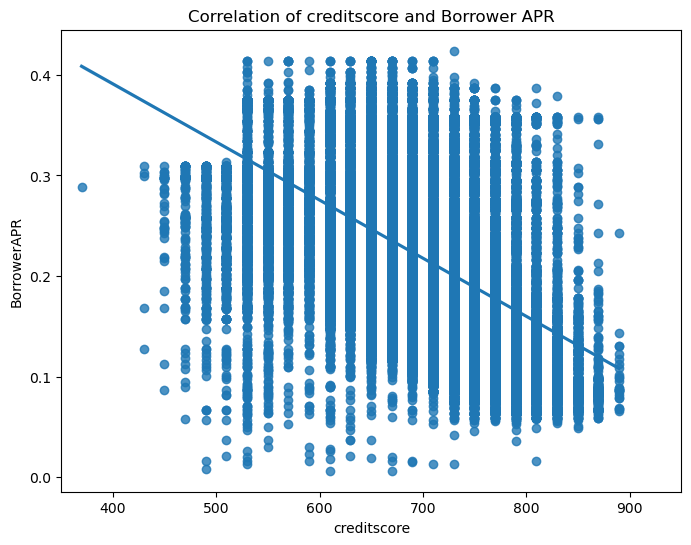

In [59]:
plt.figure(figsize=(8,6))
sb.regplot(data= factors, x='creditscore',y='BorrowerAPR')
plt.title("Correlation of creditscore and Borrower APR")
plt.xlabel('creditscore')
plt.ylabel('BorrowerAPR')
plt.xlim(350,950)# This was used to trim out an outlier that was an obvious error, because creditscores don't get that high.

### Observation:
Generally as the creditscore goes up, the BorrowerApr tends to reduce, as can be seen from the plot above.This plot implies that the better the credit score, the lesser the interest rates to be charged on the loan.

### BorrowerAPR and DelinquenciesLast7Years

Text(0, 0.5, 'BorrowerAPR')

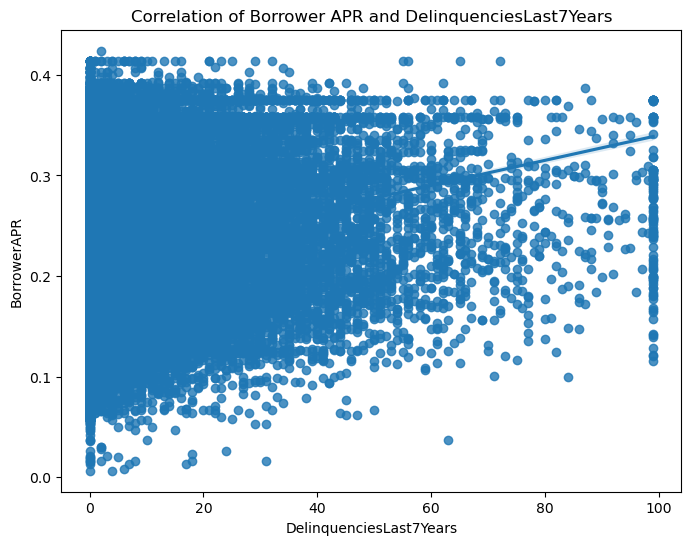

In [60]:
plt.figure(figsize=(8,6))
sb.regplot(data= factors, y='BorrowerAPR',x='DelinquenciesLast7Years')
plt.title("Correlation of Borrower APR and DelinquenciesLast7Years")
plt.xlabel('DelinquenciesLast7Years')
plt.ylabel('BorrowerAPR')

### Observation:
The delinquencies in the past 7 years variable is seen to increase linearly with the borrower APR. This indicates that the higher the delinquncies, the higher the annual interest rate will be charged.

In [61]:
### Borrower APR and Available bank credit

Text(0, 0.5, 'BorrowerAPR')

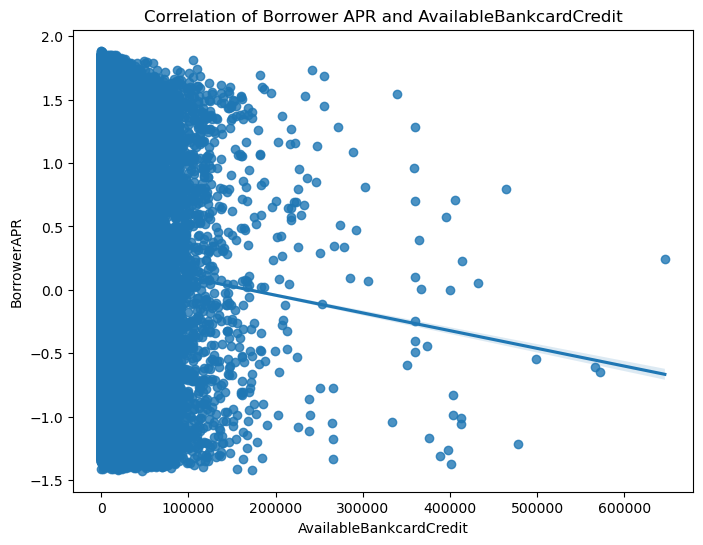

In [62]:
plt.figure(figsize=(8,6))
sb.regplot(data= factors, y='BorrowerAPR',x='AvailableBankcardCredit',x_jitter=1,y_jitter=1.5)
plt.title("Correlation of Borrower APR and AvailableBankcardCredit")
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('BorrowerAPR')

### Observation:
Available bank credit variable is seen to have a negative linear correlation with the Borrower APR, this implies that the higher the available bank credit card, the lesser the annual interest rates.

Text(0, 0.5, 'BorrowerAPR')

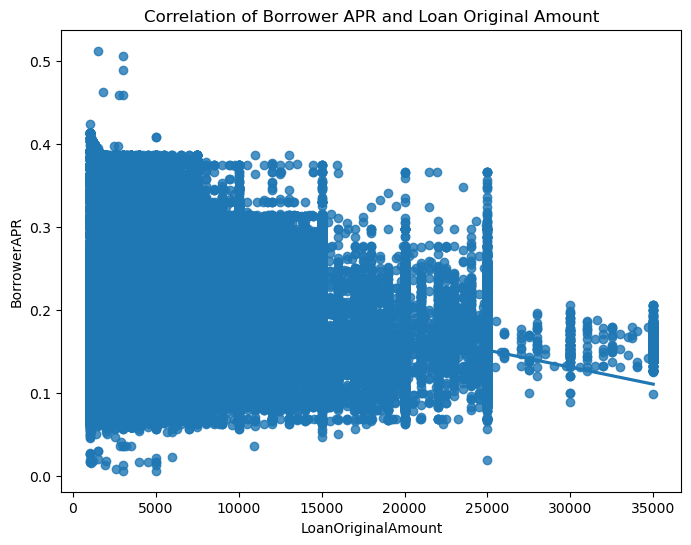

In [63]:
plt.figure(figsize=(8,6))
sb.regplot(data= factors, y='BorrowerAPR',x='LoanOriginalAmount',)
plt.title("Correlation of Borrower APR and Loan Original Amount")
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR')

## Does Employment Status affect the borrower APR?

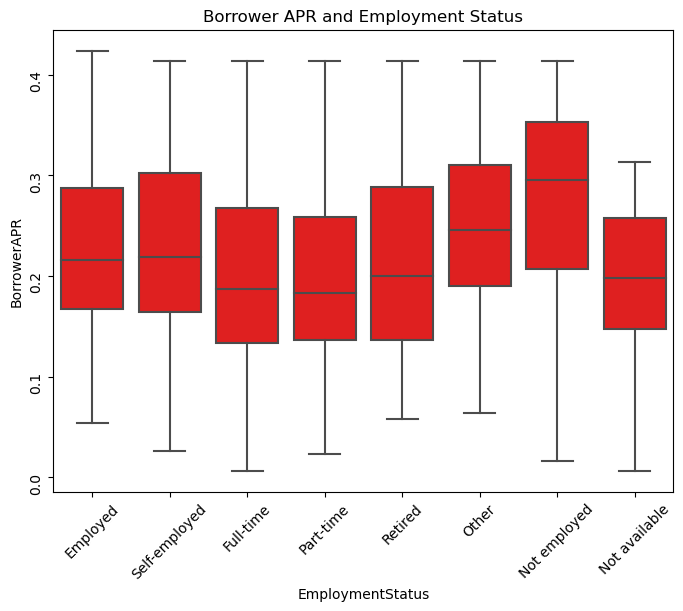

In [64]:
plt.figure(figsize=(8,6))
default_color =sb.color_palette()[0]
boxgrid(factors.EmploymentStatus,factors.BorrowerAPR)
plt.title('Borrower APR and Employment Status')
plt.xticks(rotation=45);

### Observation:
Borrowers in the not employed category tend to be charged a higher interest than others who are employed. As seen from the plot above, the fulltime and part_time categories have the lowest borrower apr's, meanwhile the other category also have a higher borrower APR.

# INSIGHT 2 SUMMARY FOR BIVARIATE ANALYSIS:
The variables in the data set that were explored and discovered to have an effect on the borrower APR includes;
1. The creditscore
2. The debt to income ratio
3. The Available bank card credit
4. Employment Status
5. Prosper score 
6. Prosper rating
7. Delinquencies in the last 7 years.
They were all found to have either a positive or negative correlation with the borrower APR.

# INSIGHT 3
## Does the term of the loan affect the annual percentage rate(Borrower's APR)  of the borrower?

Text(0.5, 1.0, 'correlation of Borrower rate and loan term')

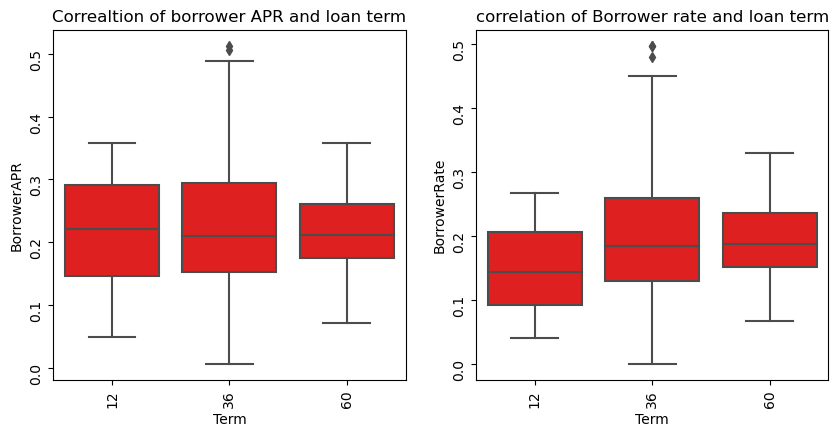

In [65]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
boxgrid(factors.Term,factors.BorrowerAPR)
plt.title('Correaltion of borrower APR and loan term')
plt.subplot(2,2,2)
boxgrid(factors.Term,factors.BorrowerRate)
plt.title('correlation of Borrower rate and loan term')

Text(0.5, 1.0, 'Loan Term Apr scores')

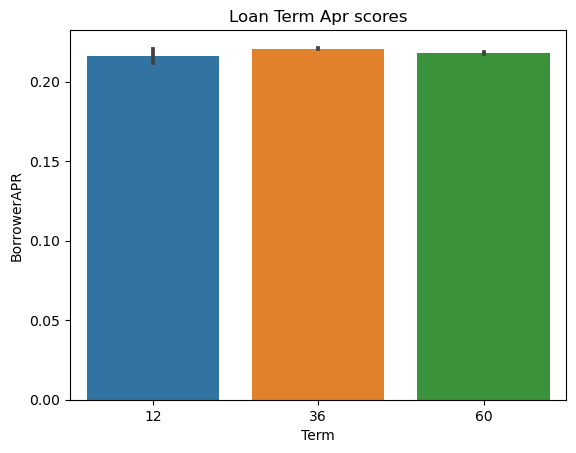

In [66]:
sb.barplot(data=factors, x='Term',y= 'BorrowerAPR').set_title('Loan Term Apr scores')

### Observation:
The 12 months sub category of the term variable had the highest APR, while the other two were of the same value.
There was an increase in the rate from 12 to 36 months and from 36 to 60 months, there was no increase .
This indicates that the term appers to have an effect on the borrower rate and not have a very significant effect on the annual interest rates that the client will be charged.
In summary the loan term has a very little effect on the annual interest rates, as can be seen from the plots above.

# MULTIVARIATE PLOTS

## INSIGHT 1: Factors that affects a loan's Status Outcome

In [67]:
#Creating a custom function for box plot
def boxgrid(x, y, **Kwargs):
    default_color = sb.color_palette()[2]
    sb.boxplot(x, y, color = default_color)

In [68]:
# creating a custom function for boxen plot
def boxen(x,y, **Kwargs):
    default_color = sb.color_palette()[3]
    sb.boxenplot(x,y, color =default_color)

In [69]:
#Blocking the warnings temporarily
import warnings
warnings.filterwarnings('ignore')

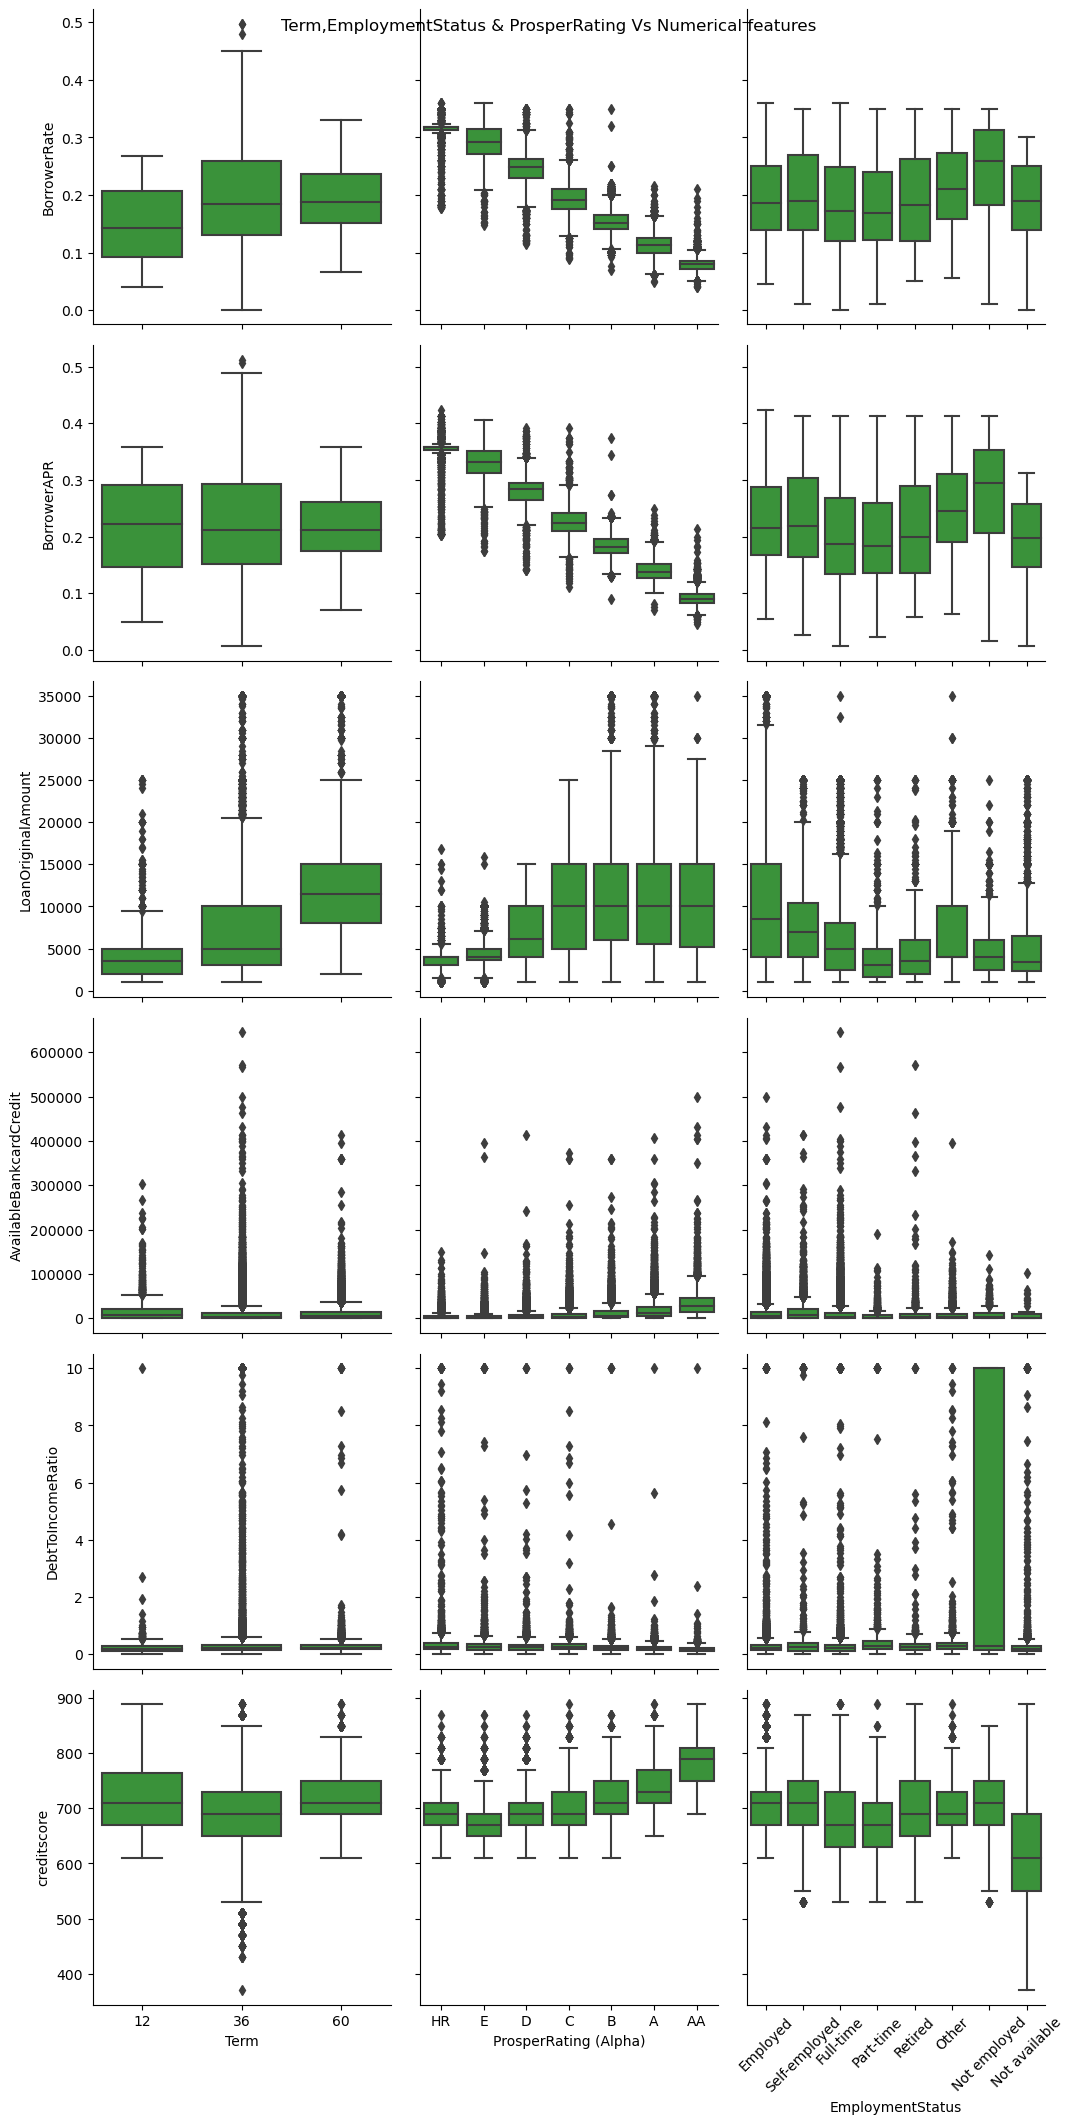

In [70]:
#creation of pairgrid using boxplots
g = sb.PairGrid(factors,y_vars = ['BorrowerRate','BorrowerAPR','LoanOriginalAmount','AvailableBankcardCredit','DebtToIncomeRatio',
                                 'creditscore'], 
                                x_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus'], height = 3.5, aspect = 1.0)
g.map(boxgrid);
plt.xticks(rotation=45);
g.fig.suptitle('Term,EmploymentStatus & ProsperRating Vs Numerical features');
plt.show();

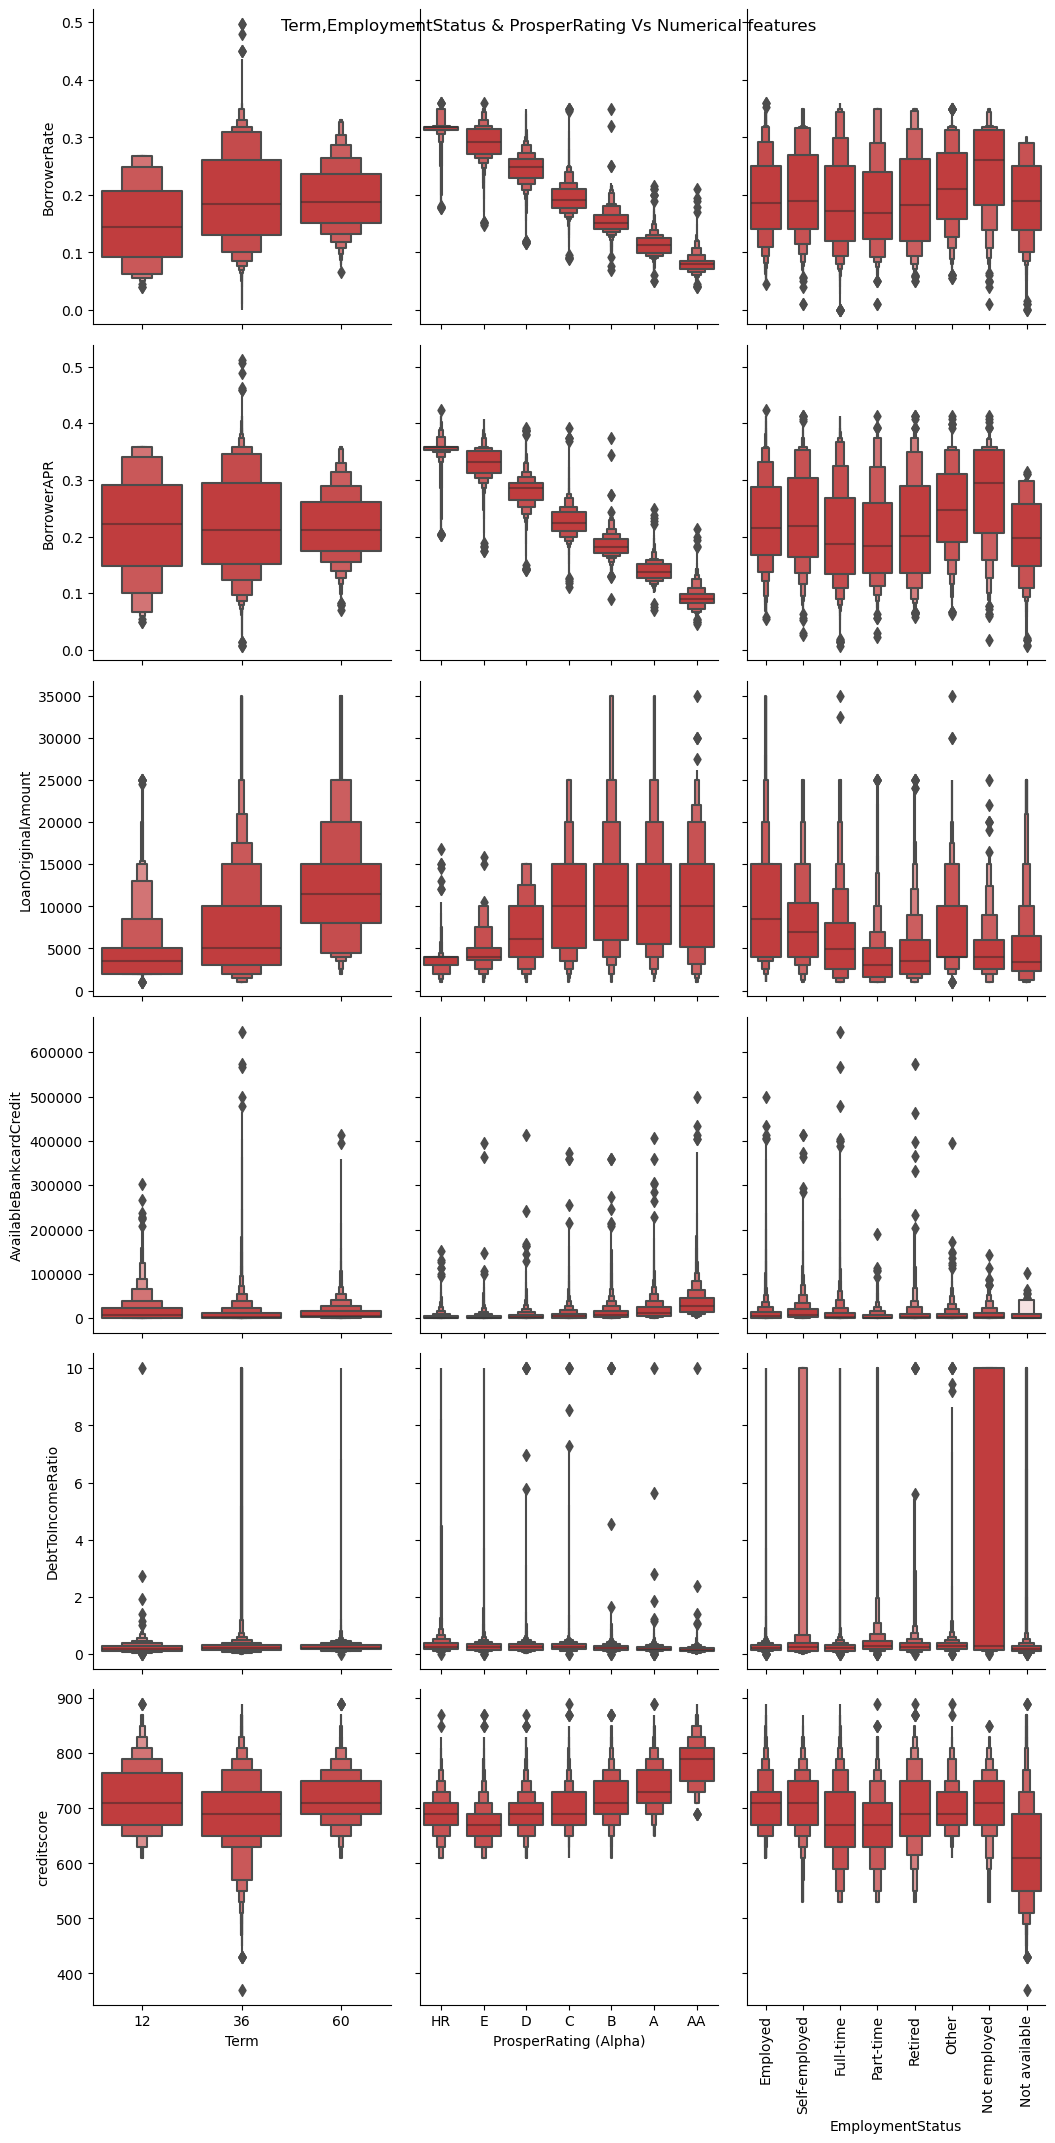

In [71]:
g=sb.PairGrid(factors,y_vars=['BorrowerRate','BorrowerAPR','LoanOriginalAmount','AvailableBankcardCredit','DebtToIncomeRatio',
                                 'creditscore'], 
                                x_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus'], height = 3.5, aspect = 1.0)
g.map(boxen);
plt.xticks(rotation=90);
g.fig.suptitle('Term,EmploymentStatus & ProsperRating Vs Numerical features');
plt.show();

### OBSERVATION:
#### Loan Original amount and Term:
The shortest loan term had the lowest original loan amount and the longest loan term had the highest loan original amount.This indicates that loan original amount have a positive linear correlation with the loan term. The bigger the amount, the longer the term will be offered to pay the loan.
#### Available bank credit and prosper rating
The AA category was seen to have the highest available bank credit. And the lowest prosper rating had the lowest available bank credit.This indicates that the bank credit plays a role in determining the prosper rating. 
#### BorrowerRate and Prosper rating
As can be seen for the plot above, there is a negative correlation between the propser rating and the borrower rate, the higher the prosper rating, the lesser the interest rates which will the customer will be charged.
#### Borrower rate and term
The borrower rate and Term have a bit of a positive correlation.It can be seen that as the loan term(repayment time) increases, the borrower rate increases.
#### Prosper score and Term
Prosperscore and Term have  a bit of a negative relationship with each other, it can be seen that the higher a borrowers propser score is, the more time will be given to repay their loans.
#### Employment status and BorrowerRate: 
Amongst the sub categories of employment status it can be seen that not employed category have the highest borrower rate, and the lowest borrower rates are for the fulltime and part time clients.It makes sense for full time workers to have a lesser interest rate charged, because they tend to have a higher chance of paying back , because of a steady income stream.
#### Employmentstatus and Prosperscore:
Fulltime category have the highest prosperscore, followed by the parttime category and the retired category,the employed category have the third highest prosper score.
#### Creditscore and Term:
The plot reveals that the credit score does not seem to have an effect on the loan's term.The 60months and 12 months term , which are the smallest and the biggest happen to have approximately the same median values for creditscore.
#### Credit score and Prosper rating:
There is a steady incline for the prosper rating as the credit score goes up,except for the HR and D sub categories of prosper rating. The credit score can be said to have a strong positive correlation with prosper rating.
Creditscore.
#### Credit score and employment Status:
The employed category had the highest credit score, followed next by the self employed category.The not employed category had the third highest credit score, it was higher than the full time and part time sub categories.
This came as a surprise.
#### Debt to income ratio and term:
The median values for all three loan term were the same. This depicts a zero correlation with both variables.
#### Debt to income ratio and prosper score:
There was a decline in the debt to income ratio as the propser score increased.This indicates thatthe debt to income ratio had a negative correlation with the prosper rating
#### Debt to income ratio and employment status:
The not employed sub category happens to have the highest debt to income ratio and the employed category have the lowest.


### Summary Of Observations for Insight 1 Multivariate plots:

### Observation:


<AxesSubplot:xlabel='Term', ylabel='BorrowerAPR'>

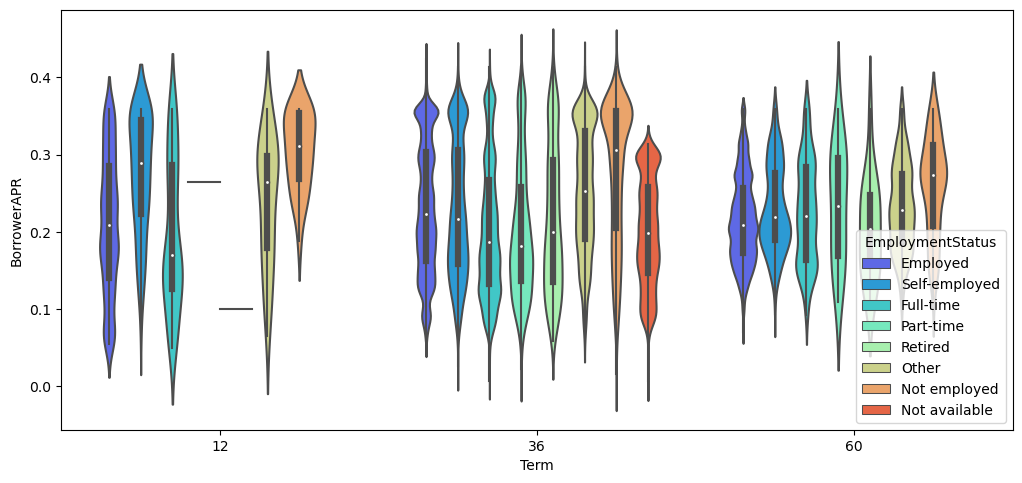

In [72]:
plt.figure(figsize=(27,12))
plt.subplot(2,2,1)
sb.violinplot(x='Term',y="BorrowerAPR",data=factors, hue='EmploymentStatus', palette='rainbow')

### Observation:
As seen from the plot,the part time category had the lowest interest rates charged , followed by the full time category in the 36months term.The not employed category had the highestinterest rates(Borrower APR).
Meanwhile for the 60 months term, a different pattern is seen.The retired category had the lowest APR followed by the employed category.
For the 12 months term, the not employed catrgory had the highest APR.
The plot is not good enough to conclude if the employment status affects the  APR.Further analysis needs to be carried out.

## Effect of loan term on borrower rate and Prosper rating

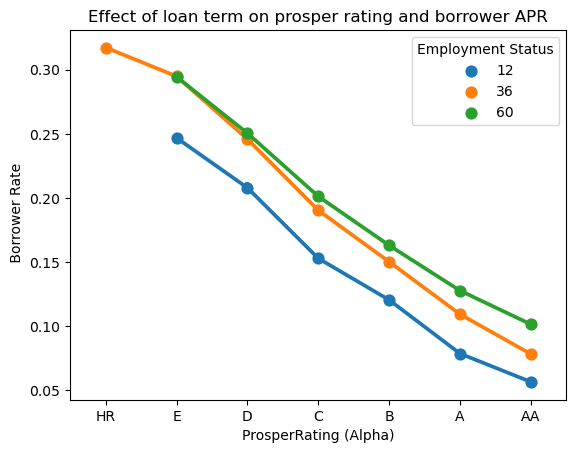

In [73]:

sb.pointplot(data=factors, x='ProsperRating (Alpha)', y='BorrowerRate', hue='Term',
                   palette='tab10');
plt.legend(loc=1, title='Employment Status');
plt.title('Effect of loan term on prosper rating and borrower APR');
plt.ylabel(' Borrower Rate');

### Observation:
For all three loan terms, there is a steady decline and a negative correlation between borrower rate and propser rating.As the prosper raing increases, the borrower rate decreases.
Across the three loan terms,a longer or higher loan term tends to attract a higher borrower rate/interest rate.This does not come as a surprise because a longer loan term results in a higher risk, and hence the company would want to be compensated for taking higher risks on the clients.It could also be as a result of accumulation of daily interest rates as well.

## Effect of employment status on prosper rating and borrower APR

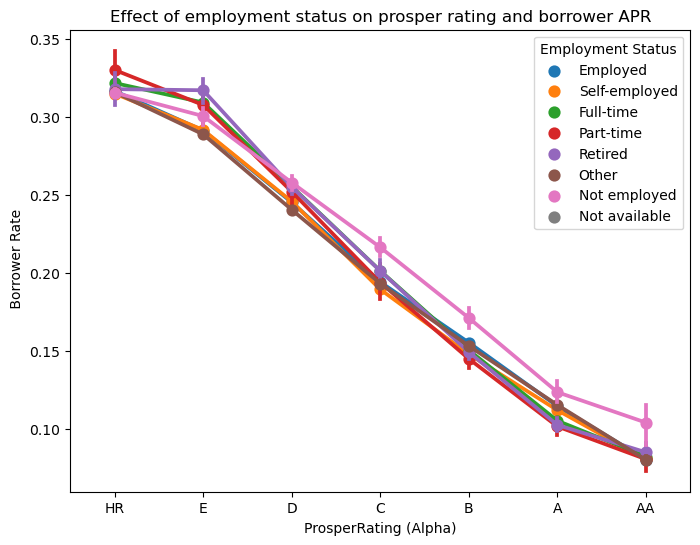

In [74]:
# Create a pointplot to show how the BorrowerRate changes for different loan Terms
# when split up by ProsperRating
plt.figure(figsize=[8,6])

sb.pointplot(data=factors, x='ProsperRating (Alpha)', y='BorrowerRate', hue='EmploymentStatus',
                   palette='tab10');
plt.legend(loc=1, title='Employment Status');
plt.title('Effect of employment status on prosper rating and borrower APR');
plt.ylabel(' Borrower Rate');

### Observation:
For all the employmnet status, there is a steady decline and a negative correlation between borrower rate and propser rating.As the prosper raing increases, the borrower rate decreases.
The unemployed borrowers are charged higher interest rates from the D subcategory to the AA sub category.The part time category was charged the highest rates for the HR category and the retired people were charged highest rates for the E category of prosper rating.

In [75]:
#!jupyter nbconvert Example_Project_Diamonds_Part2.ipynb --to slides --post serve --no-input --no-prompt

# SUMMARY:

## INSIGHT 1:
After exploring the dataset, I observed that there are certain key factors that affects/influences if a borrower will get their loan approved or not and how much interest they will be charged for their loans.
By examining Certain key performance indicators such as the prosperscore, prosper rating.
I was able to observe how certain others factors influences/affetcs the prosper score, prosper rating.
The following factors below was observed to affect the KPI's:
1.Credit score
2.Revolving credit balance
3.Stated monthly income
4.Debt to income ratio
5.Avaialble bank credit.
6.Is borrower home owner or not
The creditscore have a strong negative correlation with the borrower APR and Borrower rate, the plots showed us that the higher the credit score, the lesser the borrower APR and borrower rate charged on the loan collected by the borrower.
Credit score also had a strong positive correlation with prosper rating and propser score, this did not come as a surprise.
Surprisingly revolving credit balance was found to have a positive correlation with the prosper score. Maybe it's because  a higher revolving credit balance is indicative of the borrower's consistency in paying back their loans and having a good track record.
I also found out that borrowers with higher prosper rating tends to have a better monthly income.The both variables were found to have a positive correlation.
Debt to income ratio was negatively correlated with the prosper score, the plots indicated that a higher debt to income ratio will result in a lower prosper score and this ultimately affects if the loan will be approved for the client or not.
Available bank credit also plays an important role in determining the borrowers prosper score and prosper rating.It was seen to have a strong positive correlation with the loan original amount, and the creditscore as well.The higher the available bank credit, the higher the prosper rating and score.
It was surprising to see the data indicate that clients with a high propser rating will be charged a higher interest rate(borrower APR) with a higher loan amount, it was a bit shocking, but made alot of sense.
Borrower Rate and prosper rating have a strong negative correlation,the better the propser rating, the lesser the interest rates(borrower APR).
Owning a home while applying for a loan affects the outcome of the loan. It was seen via the plots that homeowners had higher counts in the top four prosper rating categories.
## INSIGHT 2:
The following factors were found to have a strong correlation with borrower APR;
1.prosper rating
2.Prosper score
3.Credit score
4.Delinquencies in past 7years
5.Available bank credit
6.Loan Original Amount
7.Debt to income ratio
The factors above either had a negative or positive correlation with borrower APR.
## INSIGHT 3:
The 12 months sub category of the term variable had the highest APR, while the other two were of the same value.
There was an increase in the rate from 12 to 36 months and from 36 to 60 months, there was no increase .
This indicates that the term appers to have an effect on the borrower rate and not have a very significant effect on the annual interest rates that the client will be charged.
In summary the loan term has a very little effect on the annual APR , but a slightly stronger effect on interest rates.

# Key Insights For Presentation

For the presentation, i will be looking at what factors affects outcome of a loan's status, to see if it will be accepted or rejected, I will also take a look at if the loan term affetcs the annual percentage rate of the borrower.
I focused on factors that had either a strong positive or negative correlation with the prosper score and prosper rating .
I started by examining the distribution of variables and afterwhich a heatmap was used to get a general overview of the correlation of both categoricl and numerical variables. After which different kinds of plot was used to get a clearer relationship and correlation between variables that affects the prosper score and ratings.I also used a plot to display the effect of loan term on prosper rating and borrower APR.